# IE0005 EL06 Group 7 Mini-Project
### Phua Wei An, Tan Chuan Bing, Nguyen Hoang Minh, Pagdanganan Robert Martin Gosioco
### AY 2023-24 Semester 1

Dataset from Kaggle : **"Cardiovascular Disease dataset"** by *Svetlana Ulianova*  
Source: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset (requires login)

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization

In [1]:
%matplotlib inline

# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
pd.options.mode.chained_assignment = None # default='warn'

---

# 1. Data Preparation

## 1.1. Import the Dataset

The dataset is in CSV format; hence we use the `read_csv` function from Pandas.  
Immediately after importing, take a quick look at the data using the `head` function.

In [2]:
cardioData = pd.read_csv('cardio_train.csv', delimiter = ';')
cardioData.rename(columns = {'ap_hi' : 'Systolic BP', 'ap_lo' : 'Diastolic BP', 'alco' : 'Alcohol Intake', 'cardio':'Cardiovascular Disease', 'gluc':'Glucose', 'age':'Age', 'gender':'Gender', 'height':'Height','weight':'Weight','cholesterol':'Cholesterol', 'smoke':'Smoke','active':'Physical Activity'}, inplace=True)
cardioData

id    Age  Gender  Height  Weight  Systolic BP  Diastolic BP  \
0          0  18393       2     168    62.0          110            80   
1          1  20228       1     156    85.0          140            90   
2          2  18857       1     165    64.0          130            70   
3          3  17623       2     169    82.0          150           100   
4          4  17474       1     156    56.0          100            60   
...      ...    ...     ...     ...     ...          ...           ...   
69995  99993  19240       2     168    76.0          120            80   
69996  99995  22601       1     158   126.0          140            90   
69997  99996  19066       2     183   105.0          180            90   
69998  99998  22431       1     163    72.0          135            80   
69999  99999  20540       1     170    72.0          120            80   

       Cholesterol  Glucose  Smoke  Alcohol Intake  Physical Activity  \
0                1        1      0               0                  1   
1                3        1      0               0                  1   
2                3        1      0               0                  0   
3                1        1      0               0                  1   
4                1        1      0               0                  0   
...            ...      ...    ...             ...                ...   
69995            1        1      1               0                  1   
69996            2        2      0               0                  1   
69997            3        1      0               1                  0   
69998            1        2      0               0                  0   
69999            2        1      0               0                  1   

       Cardiovascular Disease  
0                           0  
1                           1  
2                           1  
3                           1  
4                           0  
...                       ...  
69995                       0  
69996                       1  
69997                       1  
69998                       1  
69999                       0  

[70000 rows x 13 columns]

## 1.2. Replace Binary int with Strings + Remove ID Column

In [3]:
#Replaced binary int with strings

cardioData['Gender'].replace([1,2],['Female','Male'],inplace=True)
cardioData['Smoke'].replace([0,1],['No','Yes'],inplace=True)
cardioData['Cholesterol'].replace([1,2,3],['Normal','Above Normal','Well Above Normal'],inplace=True)
cardioData['Glucose'].replace([1,2,3],['Normal','Above Normal', 'Well Above Normal'],inplace=True)
cardioData['Physical Activity'].replace([0,1],['No','Yes'],inplace=True)
cardioData['Cardiovascular Disease'].replace([0,1],['No','Yes'],inplace=True)
cardioData['Alcohol Intake'].replace([0,1],['No','Yes'],inplace=True)
cardioData['Age'] = (cardioData['Age']/365).astype(int) #Change age from days to years
cardioData['Height'] = (cardioData['Height']/100).astype(float)
cardioData['BMI'] = (cardioData['Weight']/(cardioData['Height']*cardioData['Height'])).round(2) #Add BMI
del cardioData['id'] #Removing "id" column from the dataset
cardioData = cardioData[['Age', 'Gender', 'Height', 'Weight', 'BMI','Systolic BP', 'Diastolic BP',
       'Cholesterol', 'Glucose', 'Smoke', 'Alcohol Intake',
       'Physical Activity', 'Cardiovascular Disease']]

cardioData

Age  Gender  Height  Weight    BMI  Systolic BP  Diastolic BP  \
0       50    Male    1.68    62.0  21.97          110            80   
1       55  Female    1.56    85.0  34.93          140            90   
2       51  Female    1.65    64.0  23.51          130            70   
3       48    Male    1.69    82.0  28.71          150           100   
4       47  Female    1.56    56.0  23.01          100            60   
...    ...     ...     ...     ...    ...          ...           ...   
69995   52    Male    1.68    76.0  26.93          120            80   
69996   61  Female    1.58   126.0  50.47          140            90   
69997   52    Male    1.83   105.0  31.35          180            90   
69998   61  Female    1.63    72.0  27.10          135            80   
69999   56  Female    1.70    72.0  24.91          120            80   

             Cholesterol       Glucose Smoke Alcohol Intake Physical Activity  \
0                 Normal        Normal    No             No               Yes   
1      Well Above Normal        Normal    No             No               Yes   
2      Well Above Normal        Normal    No             No                No   
3                 Normal        Normal    No             No               Yes   
4                 Normal        Normal    No             No                No   
...                  ...           ...   ...            ...               ...   
69995             Normal        Normal   Yes             No               Yes   
69996       Above Normal  Above Normal    No             No               Yes   
69997  Well Above Normal        Normal    No            Yes                No   
69998             Normal  Above Normal    No             No                No   
69999       Above Normal        Normal    No             No               Yes   

      Cardiovascular Disease  
0                         No  
1                        Yes  
2                        Yes  
3                        Yes  
4                         No  
...                      ...  
69995                     No  
69996                    Yes  
69997                    Yes  
69998                    Yes  
69999                     No  

[70000 rows x 13 columns]

## 1.3. Boxplot for Numerical Features against Anomalies

<AxesSubplot:xlabel='Diastolic BP'>

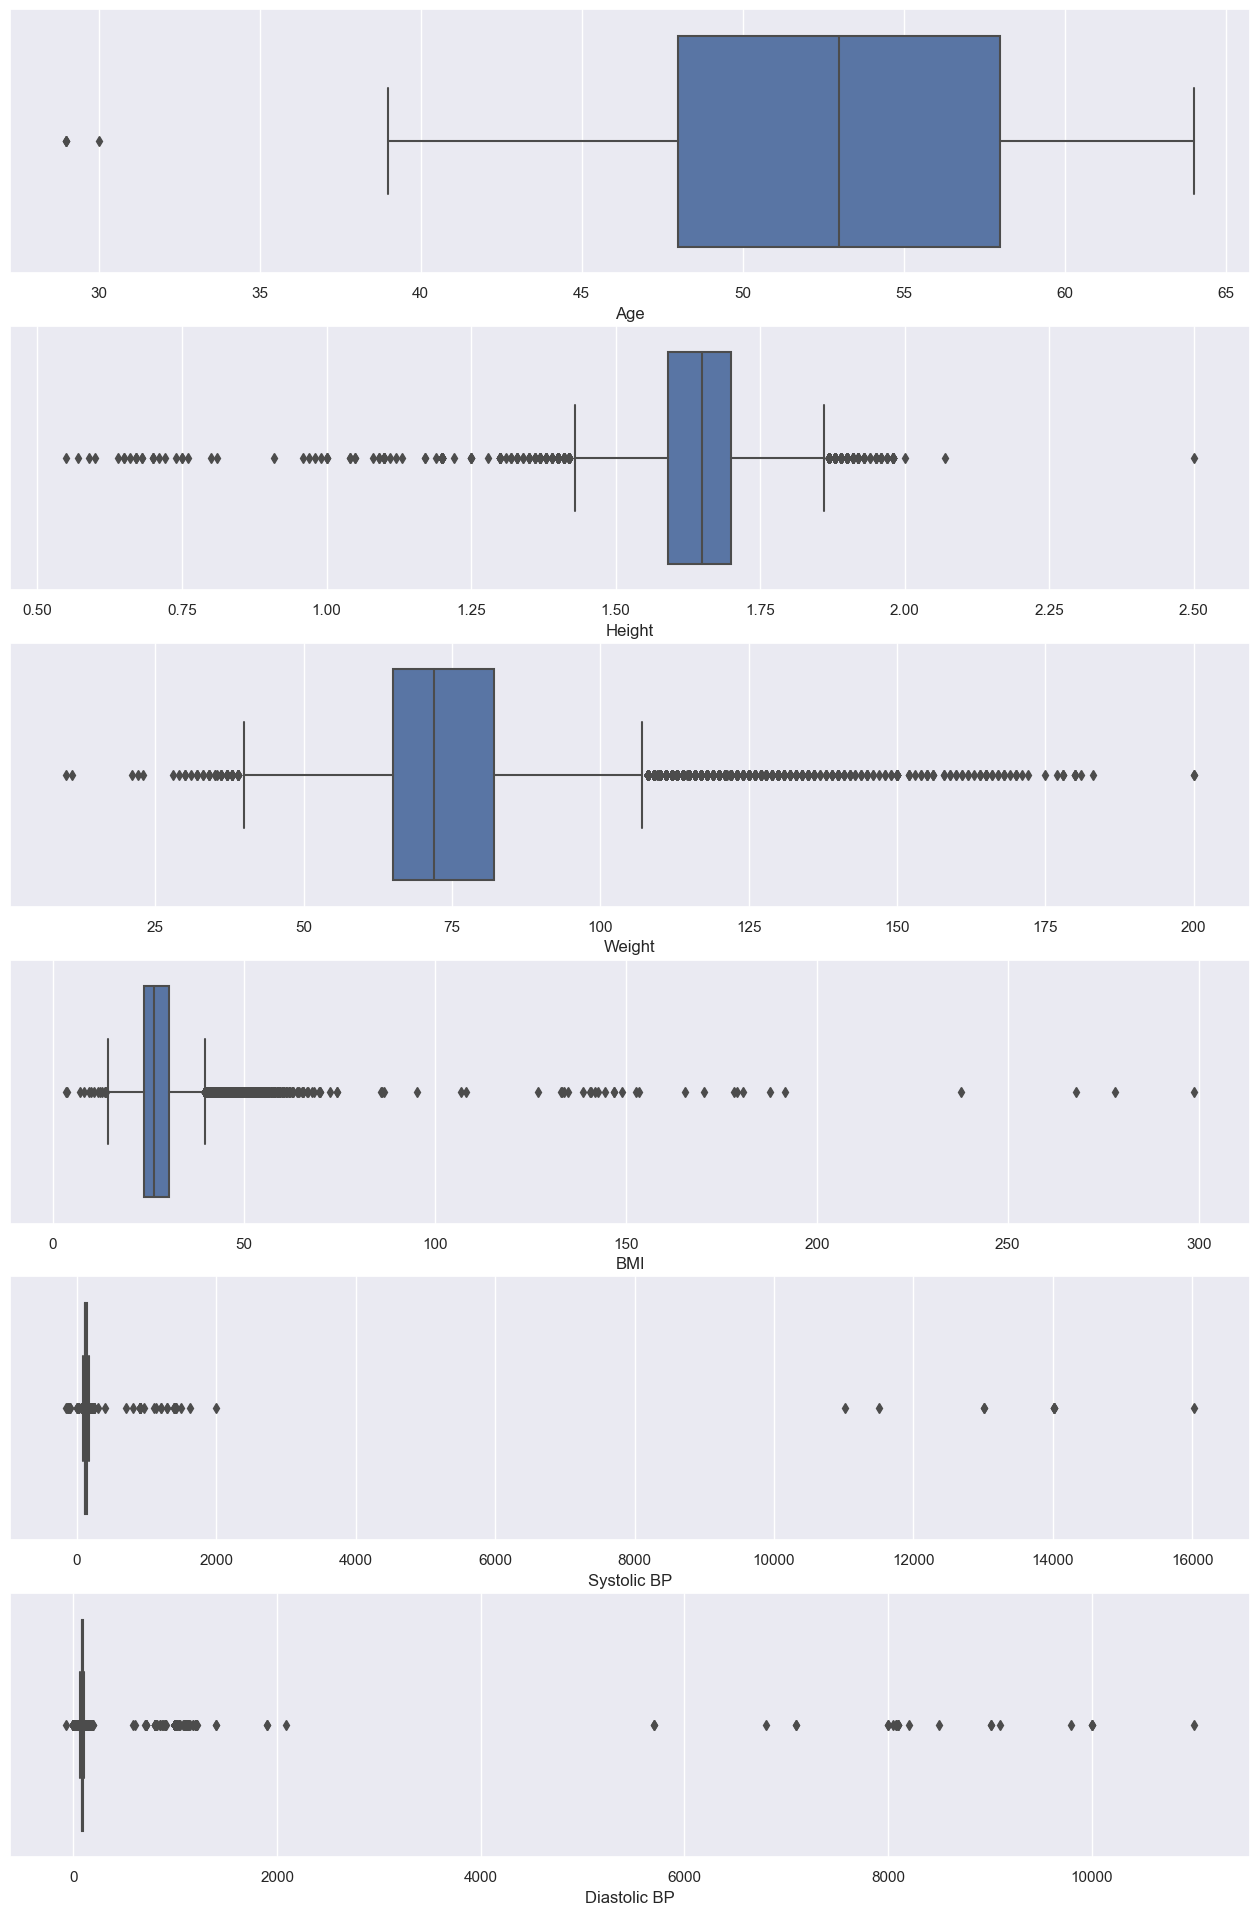

In [4]:
#Boxplots for all Features against the Anomalies
f, axes = plt.subplots(6, 1, figsize=(16,24))
sb.boxplot(x = 'Age', data = cardioData, ax = axes[0])
sb.boxplot(x = 'Height', data = cardioData, ax = axes[1])
sb.boxplot(x = 'Weight', data = cardioData, ax = axes[2])
sb.boxplot(x = 'BMI', data = cardioData, ax = axes[3])
sb.boxplot(x = 'Systolic BP', data = cardioData, ax = axes[4])
sb.boxplot(x = 'Diastolic BP', data = cardioData, ax = axes[5])

## 1.4. Draw Distribution for Numerical Variables

In [5]:
# Extract the Features from the Data
X = pd.DataFrame(cardioData[['Age', 'Height', 'Weight', 'BMI', 'Systolic BP', 'Diastolic BP']]) 
X

Age  Height  Weight    BMI  Systolic BP  Diastolic BP
0       50    1.68    62.0  21.97          110            80
1       55    1.56    85.0  34.93          140            90
2       51    1.65    64.0  23.51          130            70
3       48    1.69    82.0  28.71          150           100
4       47    1.56    56.0  23.01          100            60
...    ...     ...     ...    ...          ...           ...
69995   52    1.68    76.0  26.93          120            80
69996   61    1.58   126.0  50.47          140            90
69997   52    1.83   105.0  31.35          180            90
69998   61    1.63    72.0  27.10          135            80
69999   56    1.70    72.0  24.91          120            80

[70000 rows x 6 columns]

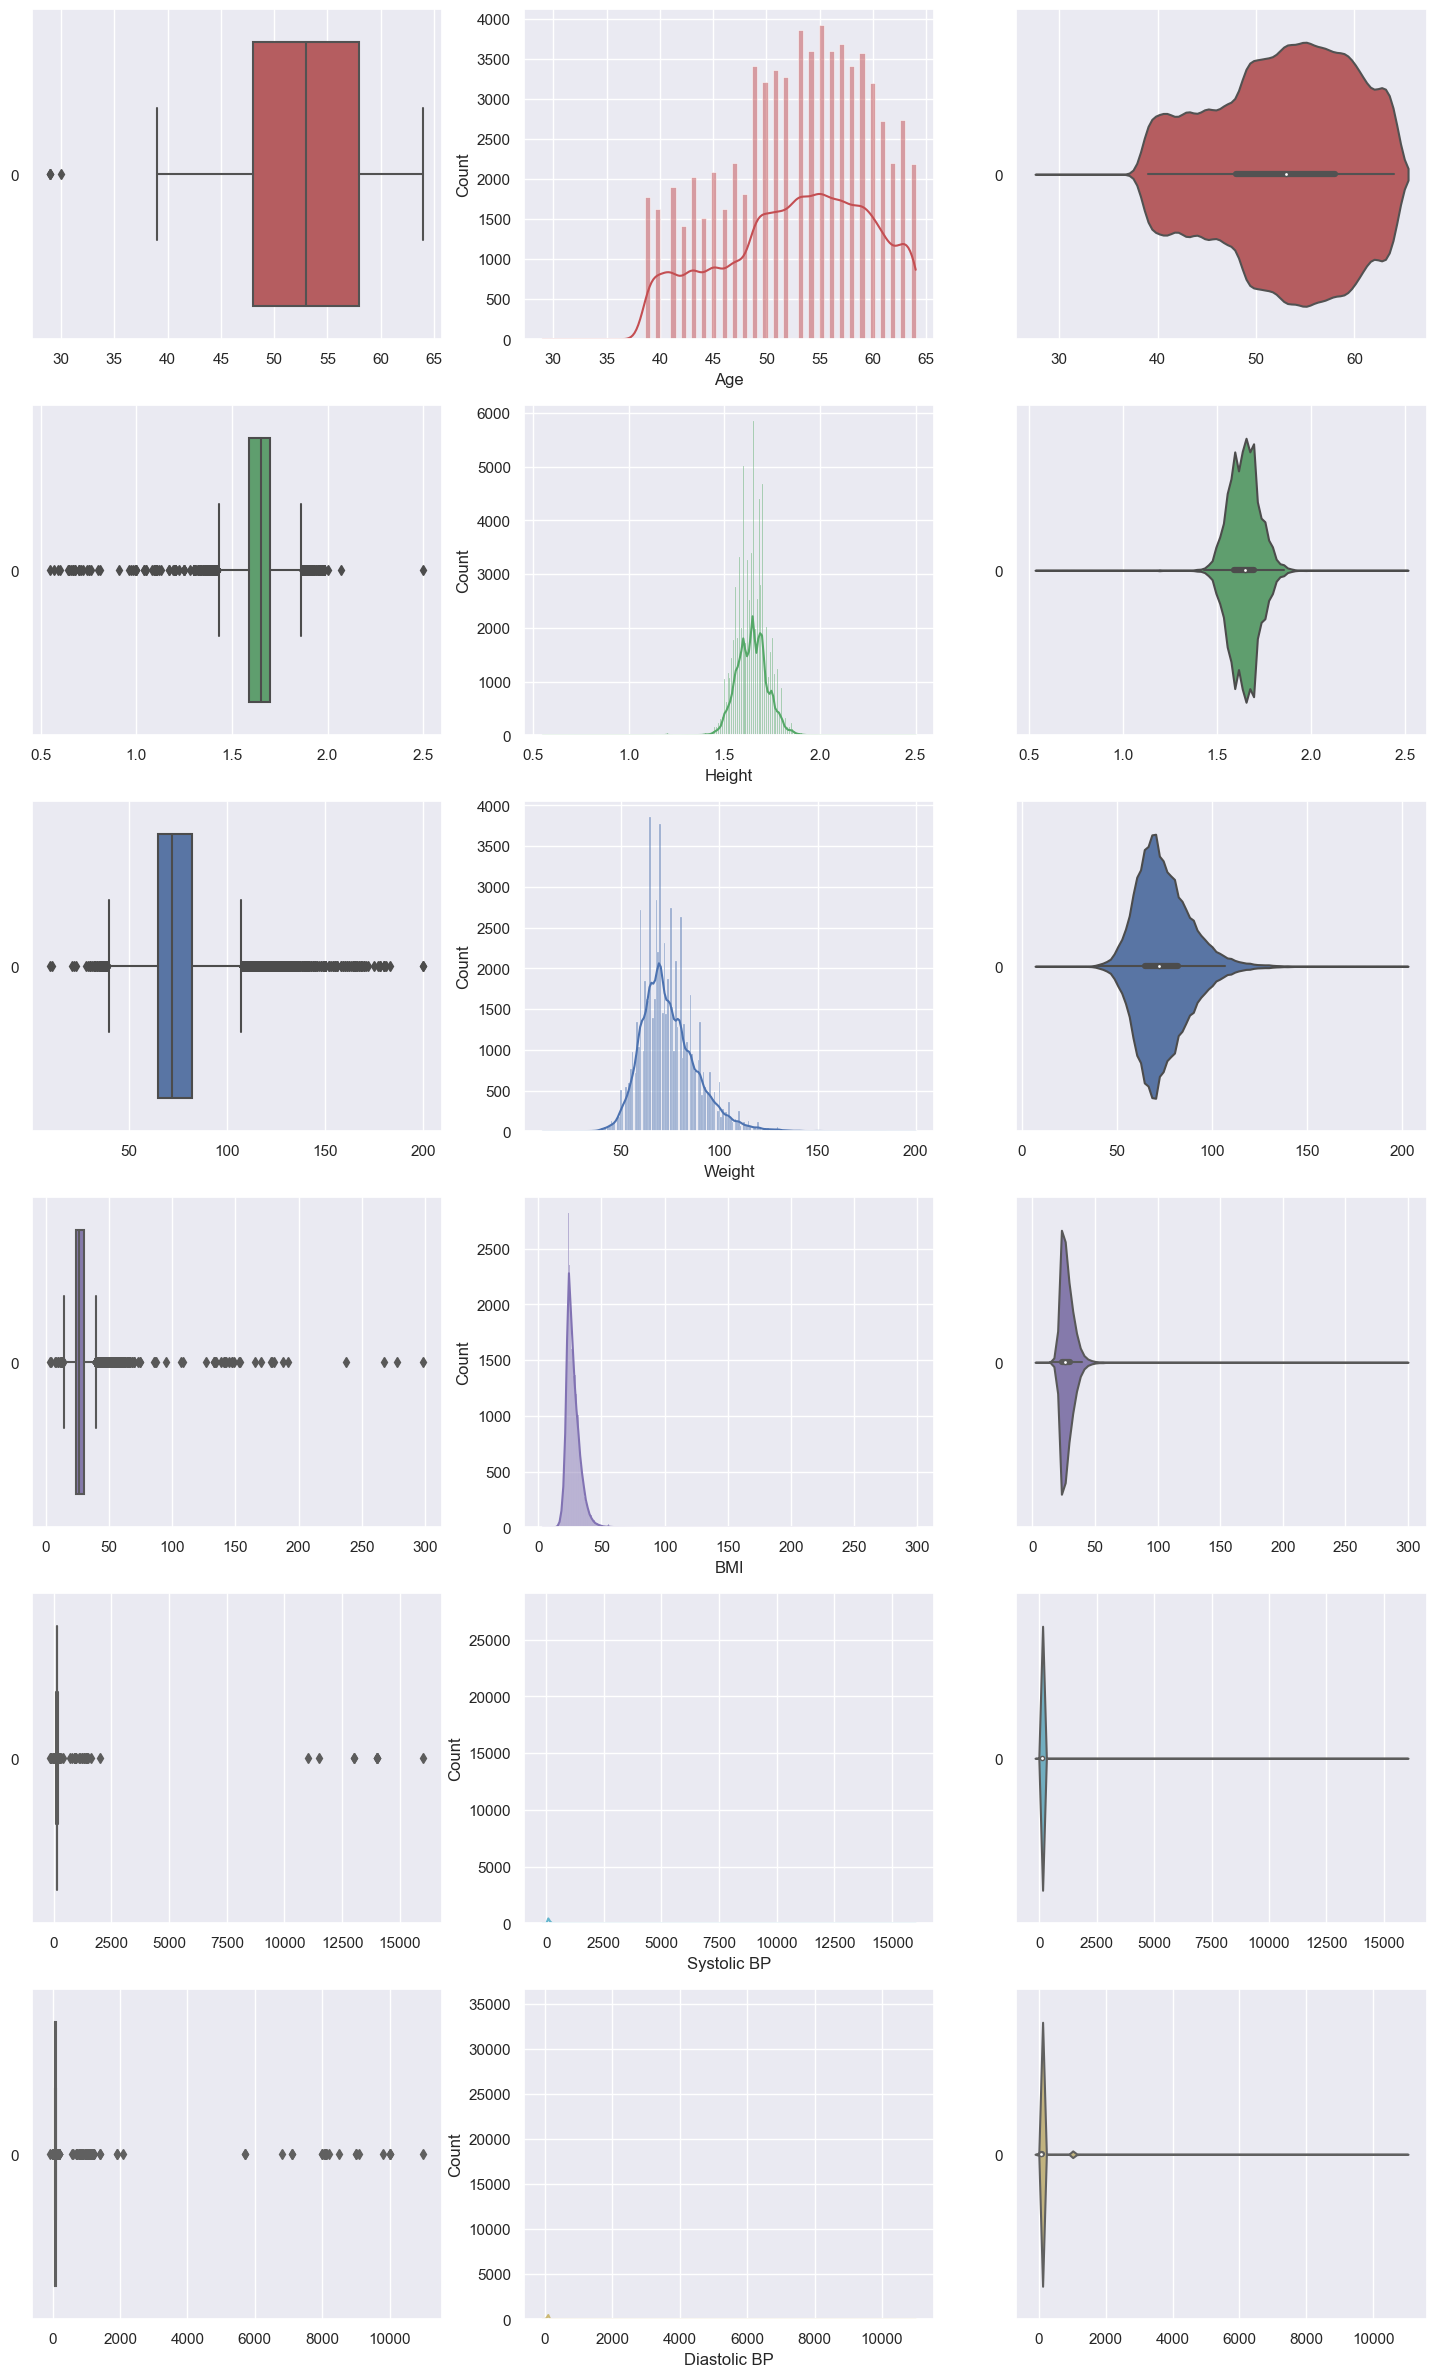

In [6]:
# Draw the distributions of all variables
f, axes = plt.subplots(6, 3, figsize=(18, 30))
colors = ["r", "g", "b", "m", "c", "y", "orange"]

count = 0
for var in X:
    sb.boxplot(data=X[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.histplot(data=X[var], color = colors[count], kde = True, ax = axes[count,1])
    sb.violinplot(data=X[var], orient = "h", color = colors[count], ax = axes[count,2])
    count += 1

## 1.5. Visualise Presence of Cardiovascular Disease in Numerical Variables

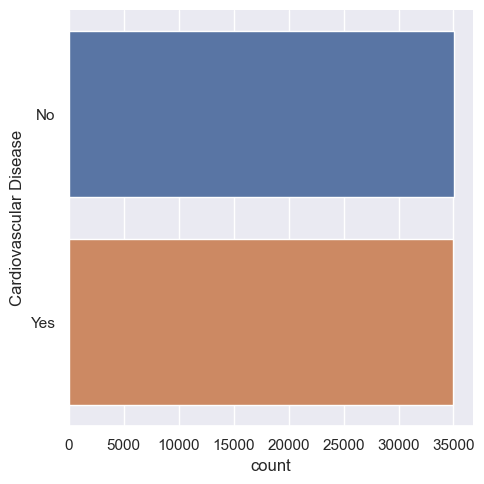

In [7]:
sb.catplot(y = "Cardiovascular Disease", data = cardioData, kind = "count")

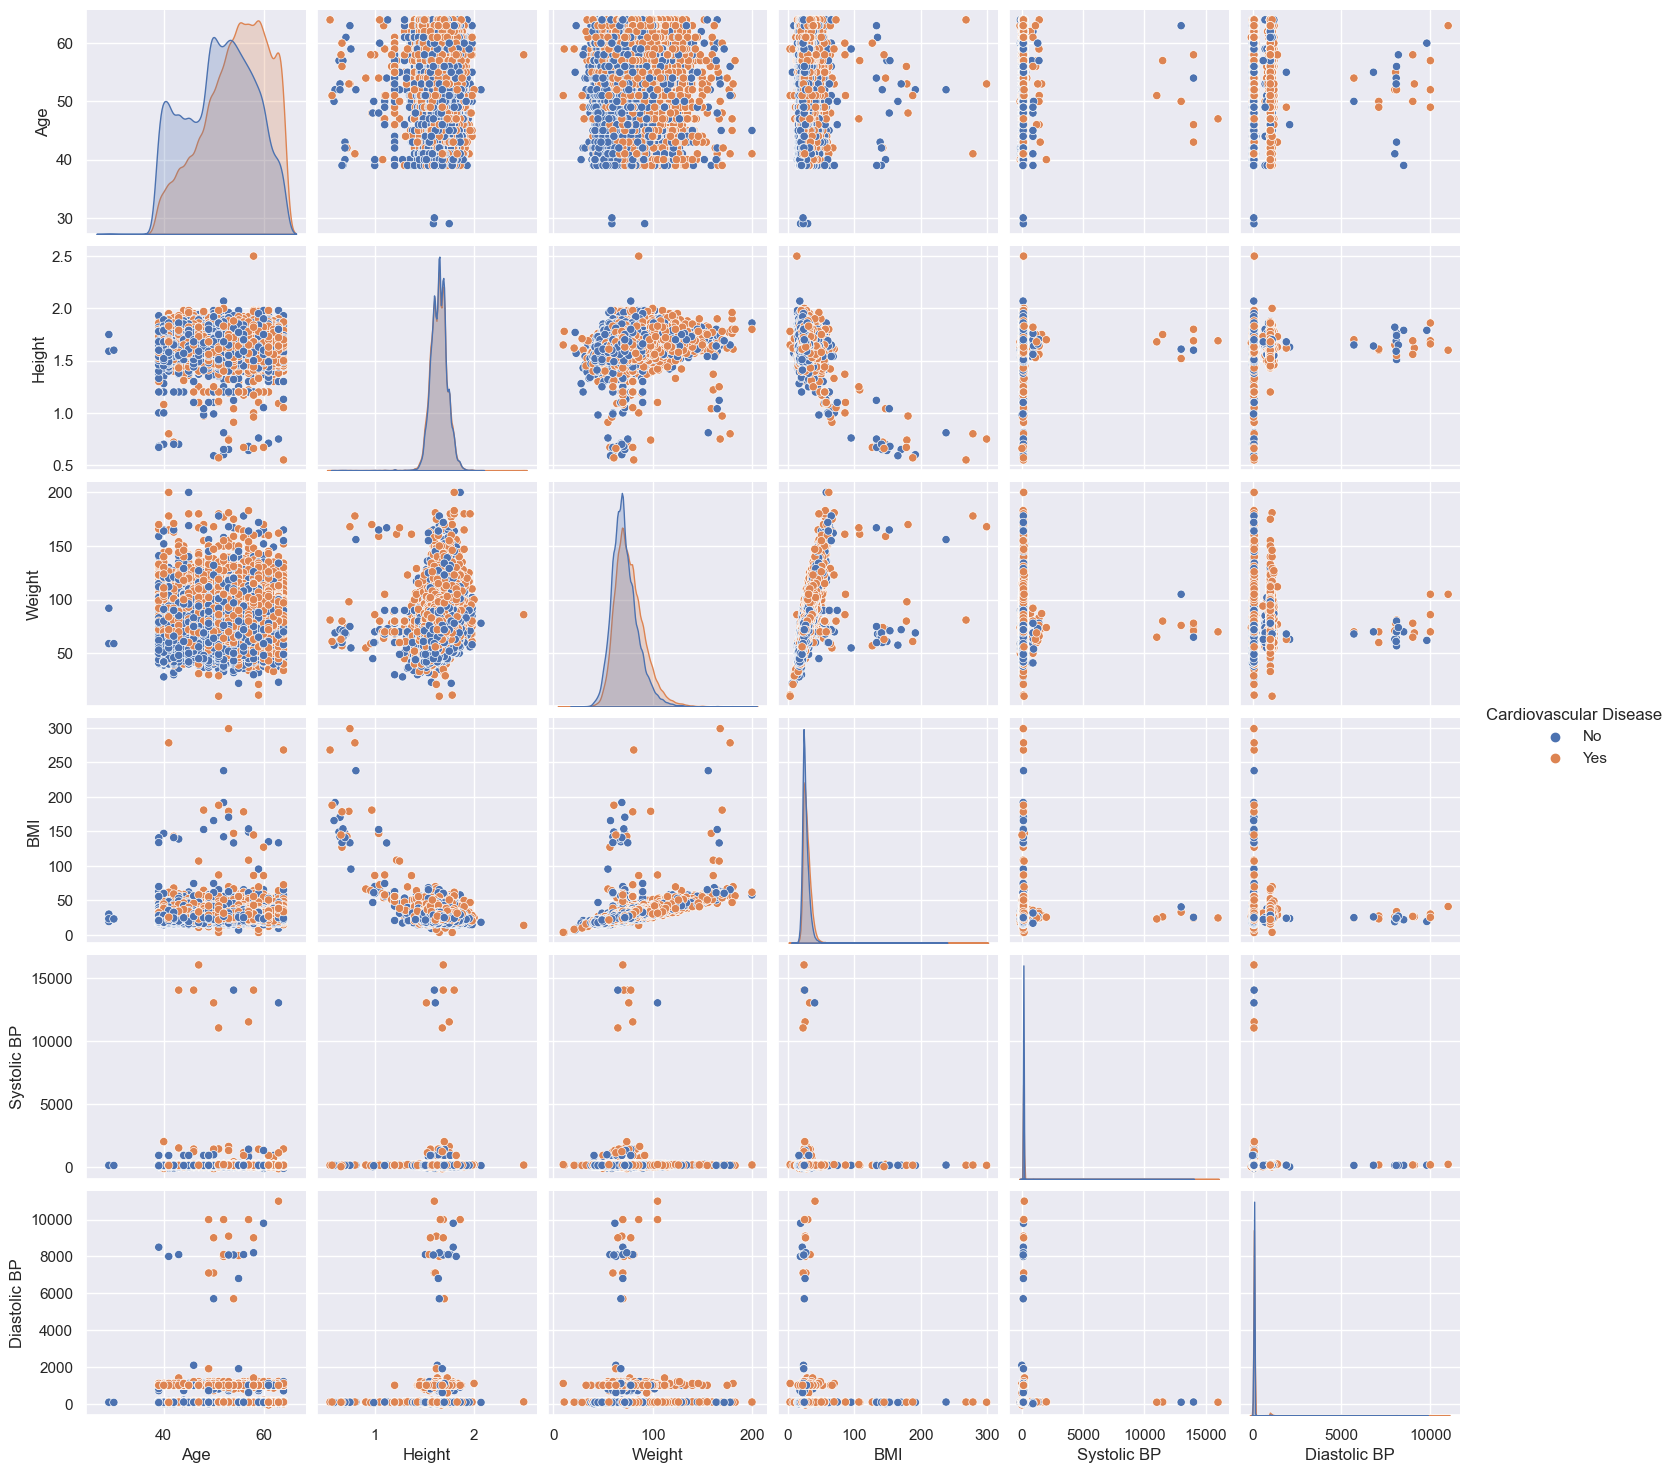

In [8]:
# Draw pairs of variables against one another
sb.pairplot(data = cardioData, hue = "Cardiovascular Disease")

# 2. Exploratory Analysis

## 2.1. Anomaly Detection

### 2.1.1. Visualise Anomalies in Numerical Variables

<AxesSubplot:xlabel='Anomaly', ylabel='count'>

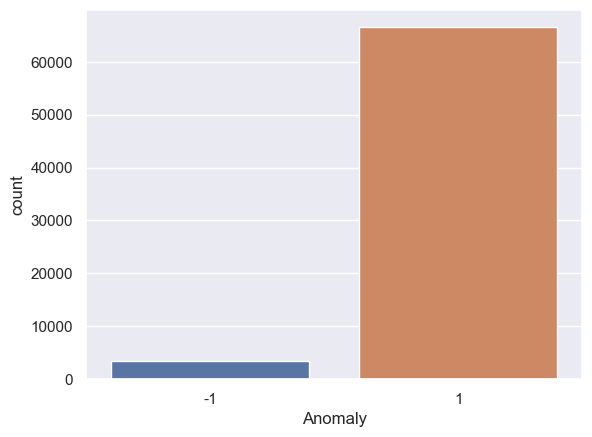

In [9]:
# Import LocalOutlierFactor from sklearn.neighbors
from sklearn.neighbors import LocalOutlierFactor

# Set the Parameters for Neighborhood
num_neighbors = 50      # Number of Neighbors
cont_fraction = 0.05      # Fraction of Anomalies

# Create Anomaly Detection Model using LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

# Fit the Model on the Data and Predict Anomalies
lof.fit(X)

# Predict the Anomalies
labels = lof.fit_predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sb.countplot(x=X_labeled["Anomaly"])

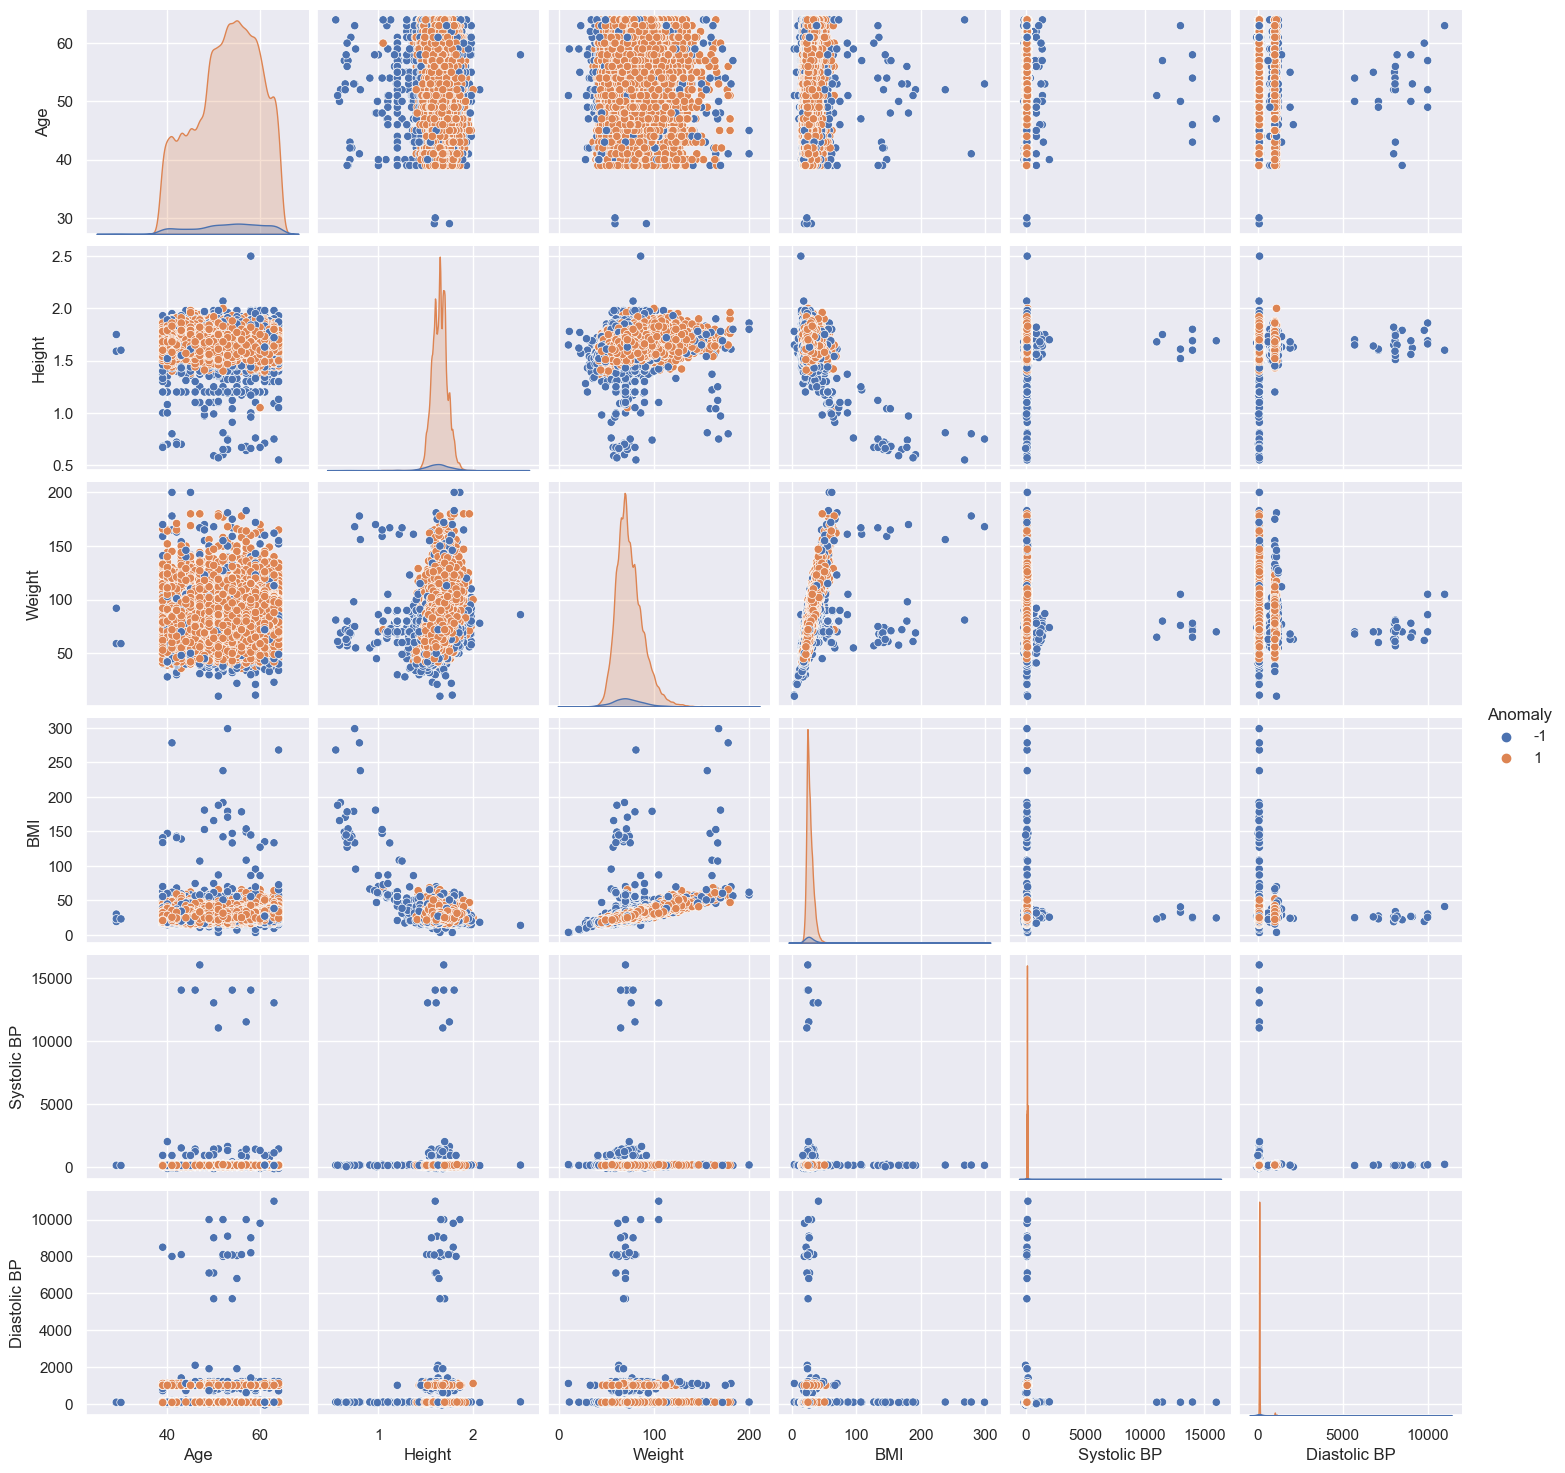

In [10]:
# Visualize the Anomalies in the Data
sb.pairplot(X_labeled, vars = X.columns.values, hue = "Anomaly")

### 2.1.2. Clean Dataset

In [11]:
cols_to_check = ['Age', 'Height', 'Weight', 'BMI', 'Systolic BP', 'Diastolic BP']

# Calculate the first and third quartiles and the interquartile range (IQR) for each column
q1 = cardioData[cols_to_check].quantile(0.25)
q3 = cardioData[cols_to_check].quantile(0.75)
iqr = q3 - q1

# Define the upper and lower bounds for each column using the IQR method
lower_bounds = q1 - 1.5 * iqr
upper_bounds = q3 + 1.5 * iqr

# Remove the rows where any of the columns have a value outside the bounds
cardioData_removed = cardioData[~((cardioData[cols_to_check] < lower_bounds) | (cardioData[cols_to_check] > upper_bounds)).any(axis=1)]

# Save the cleaned dataset to a new CSV file
cardioData_removed.to_csv('cleaned_cardio_train.csv', index=False)

cleaned_cardioData = pd.read_csv('cleaned_cardio_train.csv')

In [12]:
# Check if there is any missing value in the dataset
cleaned_cardioData.isnull().any().any()

False

In [13]:
cleaned_cardioData

Age  Gender  Height  Weight    BMI  Systolic BP  Diastolic BP  \
0       50    Male    1.68    62.0  21.97          110            80   
1       55  Female    1.56    85.0  34.93          140            90   
2       51  Female    1.65    64.0  23.51          130            70   
3       48    Male    1.69    82.0  28.71          150           100   
4       60  Female    1.51    67.0  29.38          120            80   
...    ...     ...     ...     ...    ...          ...           ...   
61779   53  Female    1.72    70.0  23.66          130            90   
61780   57  Female    1.65    80.0  29.38          150            80   
61781   52    Male    1.68    76.0  26.93          120            80   
61782   61  Female    1.63    72.0  27.10          135            80   
61783   56  Female    1.70    72.0  24.91          120            80   

             Cholesterol       Glucose Smoke Alcohol Intake Physical Activity  \
0                 Normal        Normal    No             No               Yes   
1      Well Above Normal        Normal    No             No               Yes   
2      Well Above Normal        Normal    No             No                No   
3                 Normal        Normal    No             No               Yes   
4           Above Normal  Above Normal    No             No                No   
...                  ...           ...   ...            ...               ...   
61779             Normal        Normal    No             No               Yes   
61780             Normal        Normal    No             No               Yes   
61781             Normal        Normal   Yes             No               Yes   
61782             Normal  Above Normal    No             No                No   
61783       Above Normal        Normal    No             No               Yes   

      Cardiovascular Disease  
0                         No  
1                        Yes  
2                        Yes  
3                        Yes  
4                         No  
...                      ...  
61779                    Yes  
61780                    Yes  
61781                     No  
61782                    Yes  
61783                     No  

[61784 rows x 13 columns]

<AxesSubplot:xlabel='Diastolic BP'>

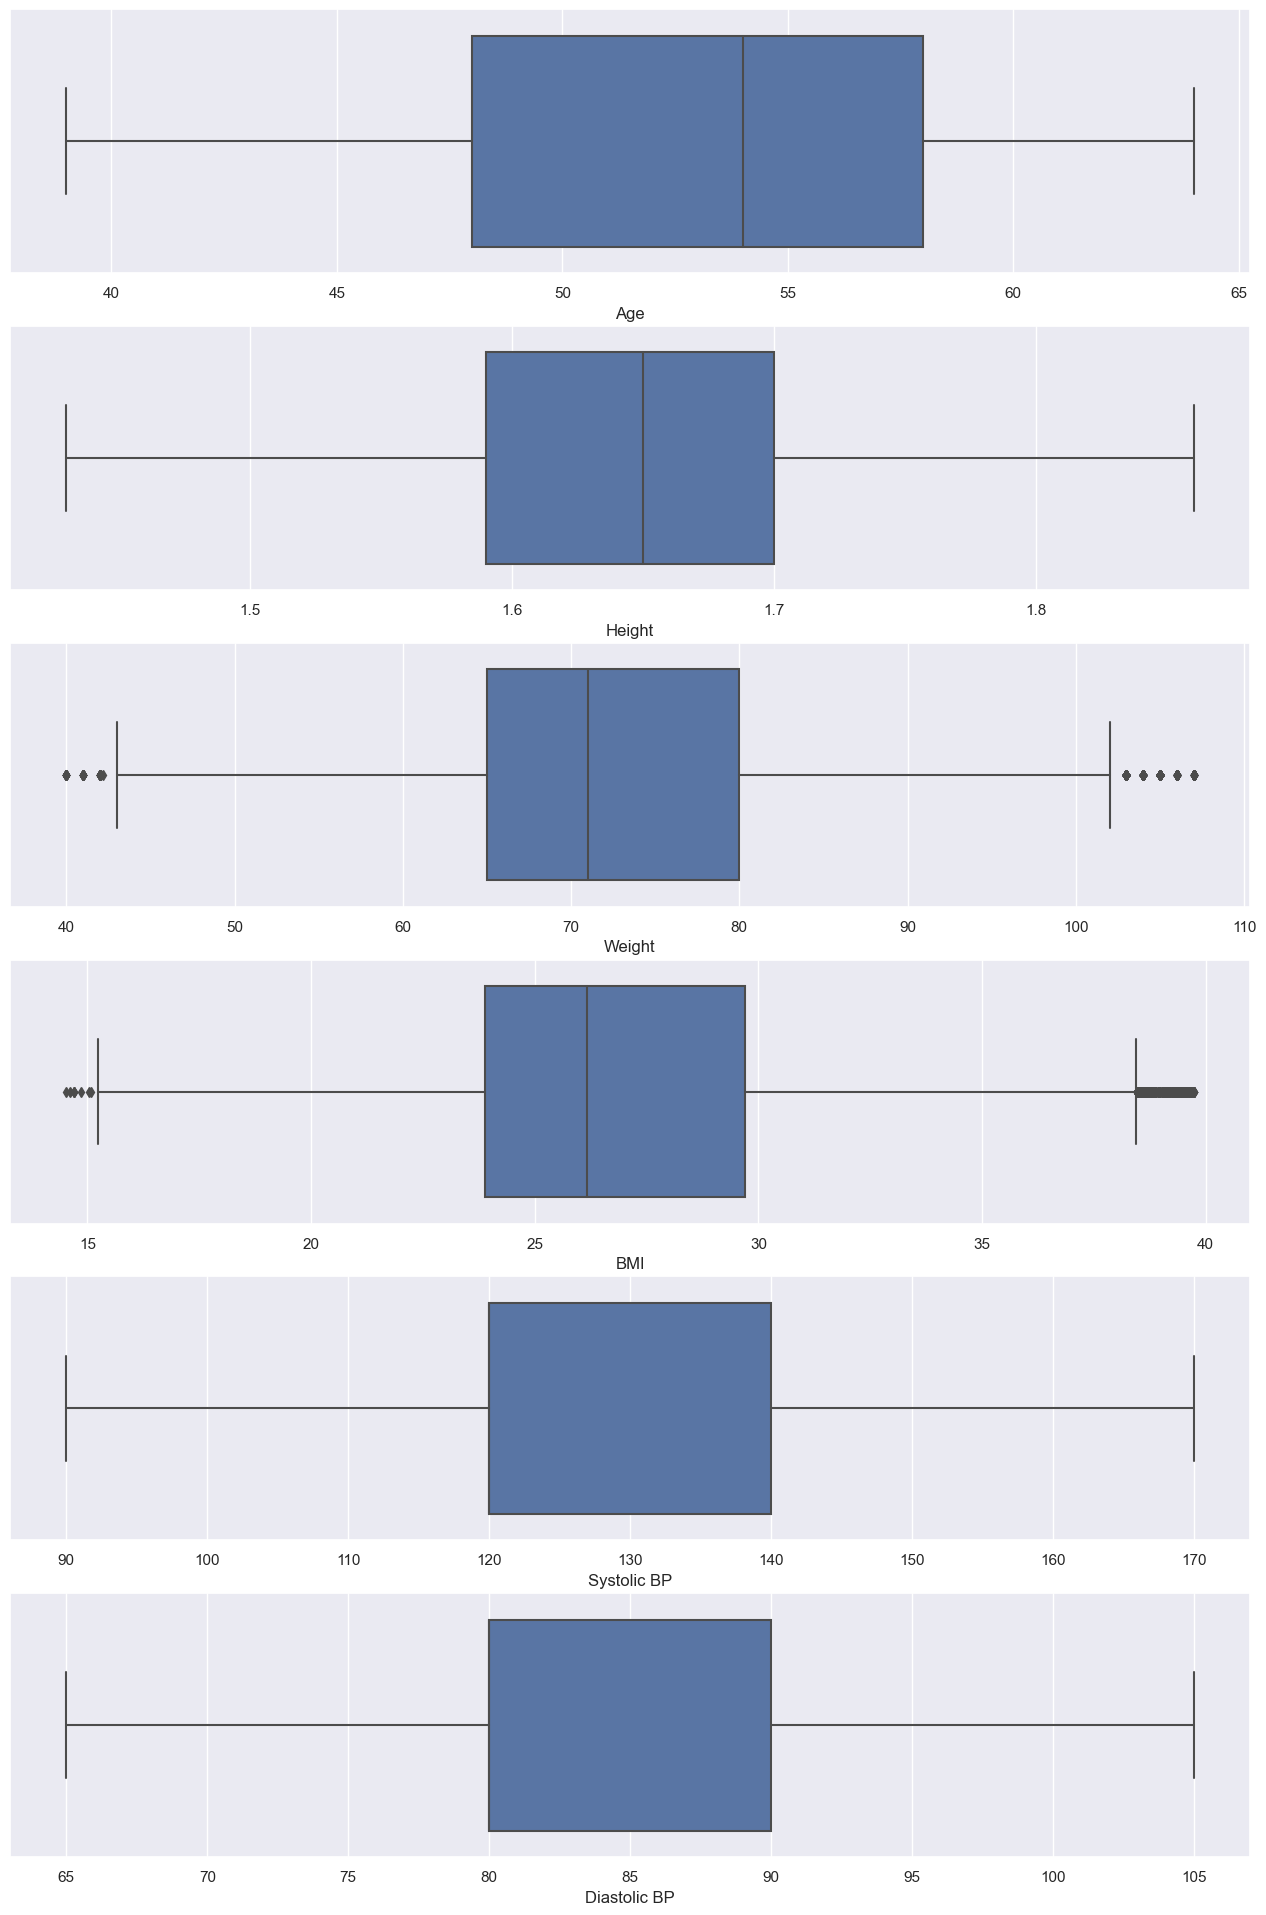

In [14]:
#Boxplots for all Features against the Anomalies
f, axes = plt.subplots(6, 1, figsize=(16,24))
sb.boxplot(x = 'Age', data = cleaned_cardioData, ax = axes[0])
sb.boxplot(x = 'Height', data = cleaned_cardioData, ax = axes[1])
sb.boxplot(x = 'Weight', data = cleaned_cardioData, ax = axes[2])
sb.boxplot(x = 'BMI', data = cleaned_cardioData, ax = axes[3])
sb.boxplot(x = 'Systolic BP', data = cleaned_cardioData, ax = axes[4])
sb.boxplot(x = 'Diastolic BP', data = cleaned_cardioData, ax = axes[5])

In [15]:
cleaned_cardioData.describe()

Age        Height        Weight           BMI   Systolic BP  \
count  61784.000000  61784.000000  61784.000000  61784.000000  61784.000000   
mean      52.888402      1.645170     72.873852     26.952457    126.321960   
std        6.744866      0.074891     11.988992      4.313780     14.254517   
min       39.000000      1.430000     40.000000     14.530000     90.000000   
25%       48.000000      1.590000     65.000000     23.877500    120.000000   
50%       54.000000      1.650000     71.000000     26.170000    120.000000   
75%       58.000000      1.700000     80.000000     29.710000    140.000000   
max       64.000000      1.860000    107.000000     39.730000    170.000000   

       Diastolic BP  
count  61784.000000  
mean      81.653810  
std        7.654028  
min       65.000000  
25%       80.000000  
50%       80.000000  
75%       90.000000  
max      105.000000

In [16]:
#checking the shape of cleaned data
cleaned_cardioData.shape

(61784, 13)

## 2.2. Catplots

### 2.2.1. Original Dataset

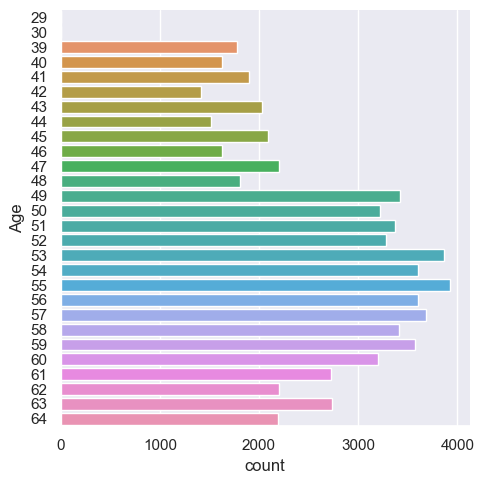

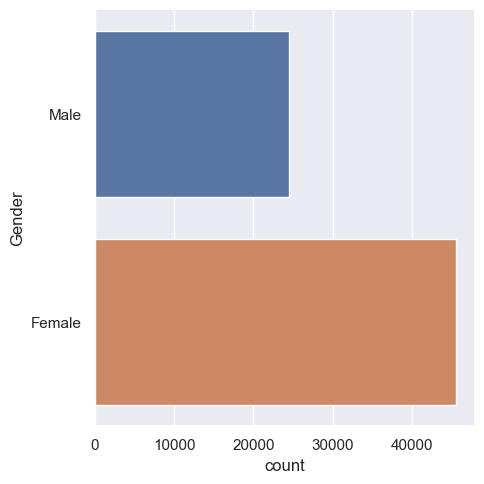

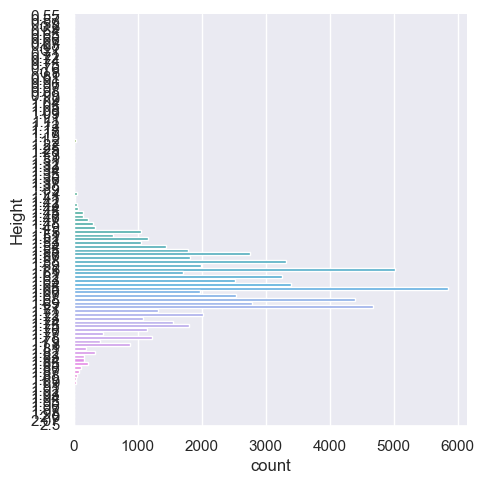

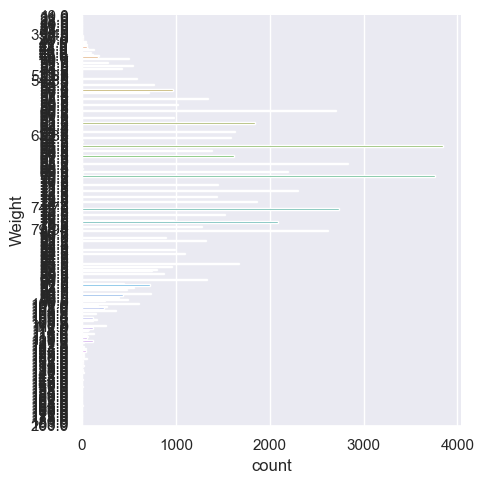

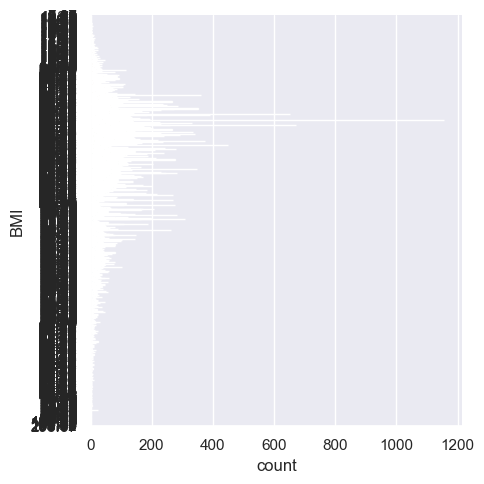

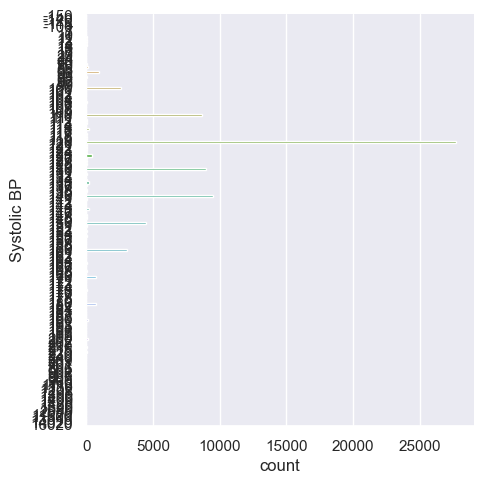

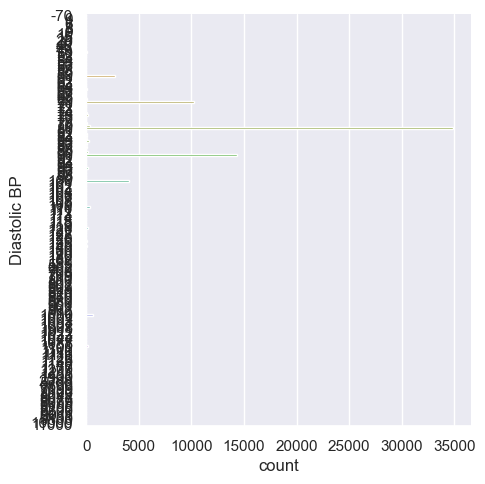

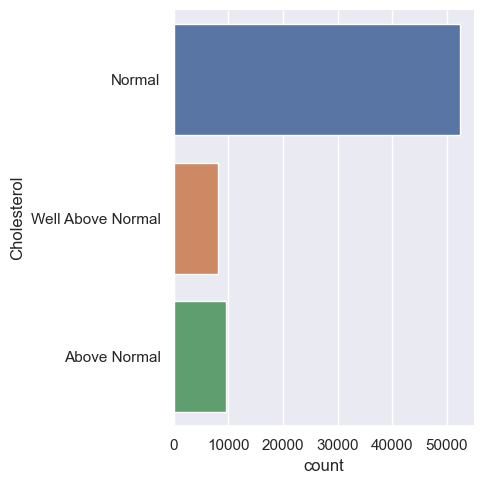

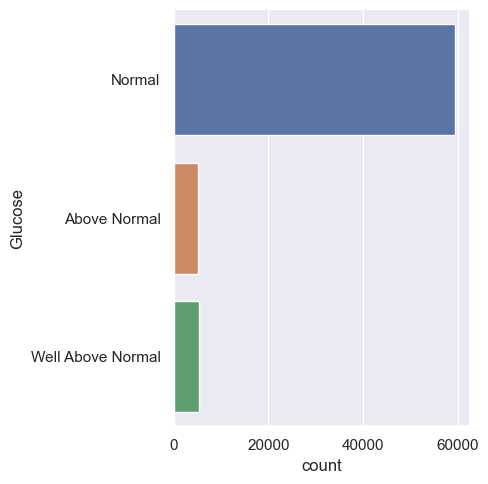

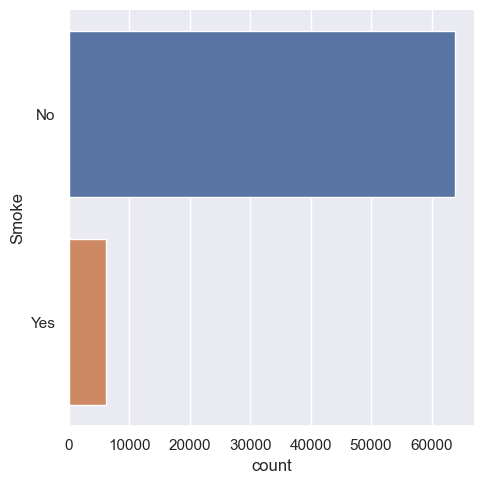

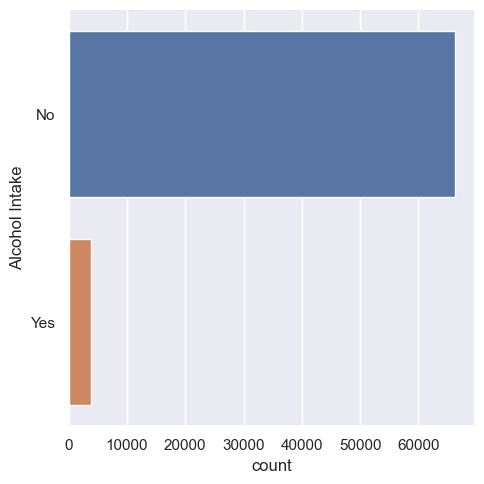

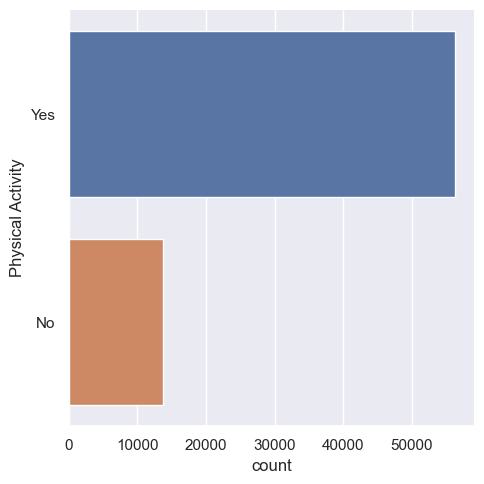

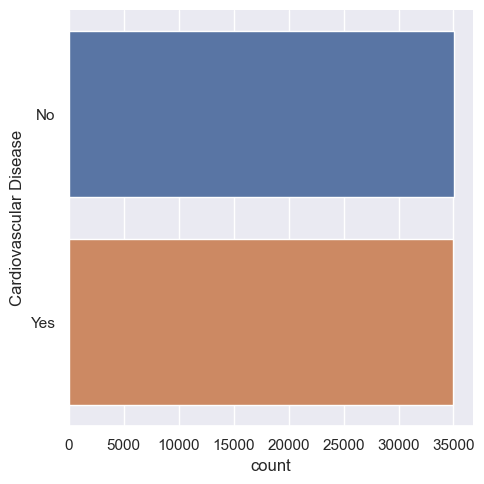

In [17]:
sb.catplot(y = "Age", data = cardioData, kind = "count")
sb.catplot(y = "Gender", data = cardioData, kind = "count")
sb.catplot(y = "Height", data = cardioData, kind = "count")
sb.catplot(y = "Weight", data = cardioData, kind = "count")
sb.catplot(y = "BMI", data = cardioData, kind = "count")
sb.catplot(y = "Systolic BP", data = cardioData, kind = "count")
sb.catplot(y = "Diastolic BP", data = cardioData, kind = "count")
sb.catplot(y = "Cholesterol", data = cardioData, kind = "count")
sb.catplot(y = "Glucose", data = cardioData, kind = "count")
sb.catplot(y = "Smoke", data = cardioData, kind = "count")
sb.catplot(y = "Alcohol Intake", data = cardioData, kind = "count")
sb.catplot(y = "Physical Activity", data = cardioData, kind = "count")
sb.catplot(y = "Cardiovascular Disease", data = cardioData, kind = "count")

### 2.2.2. Cleaned Dataset

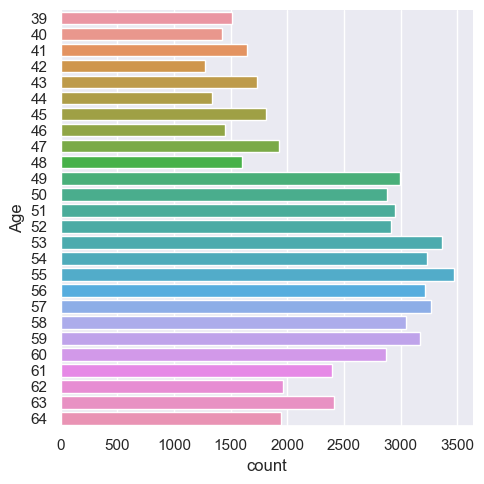

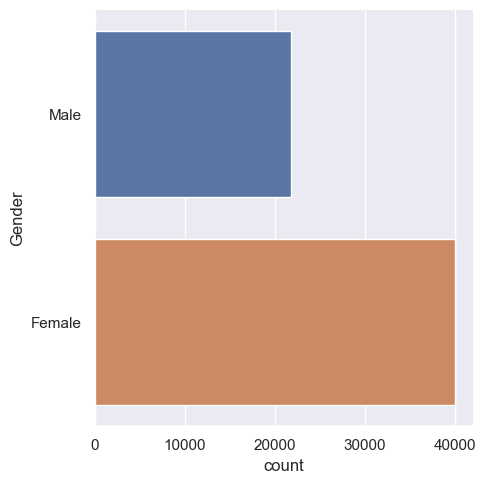

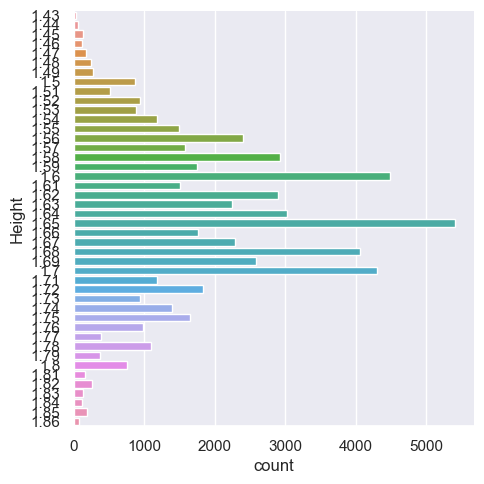

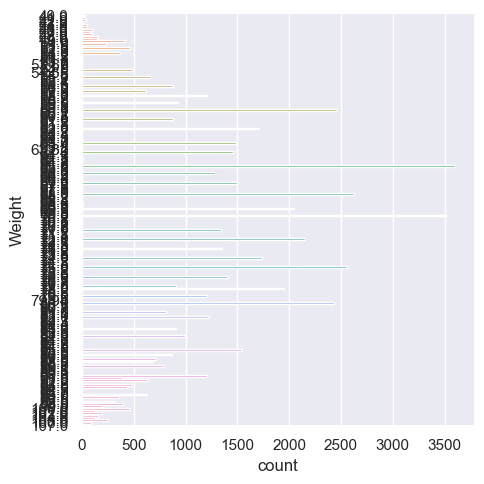

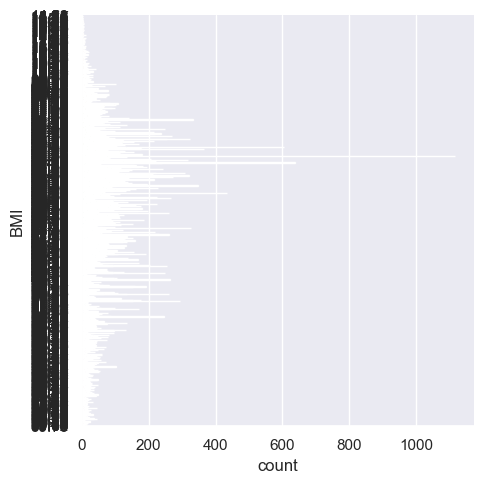

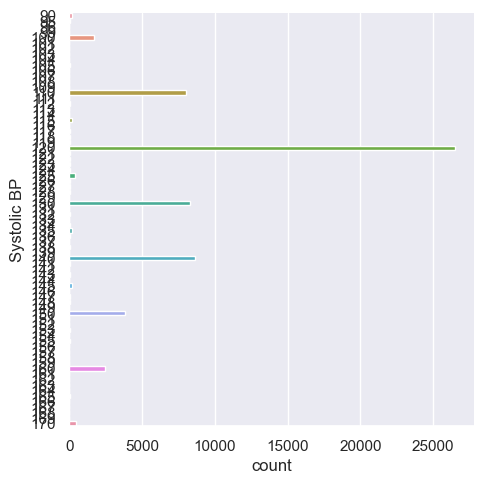

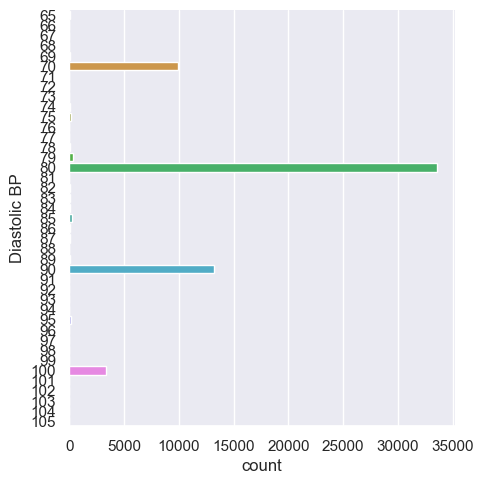

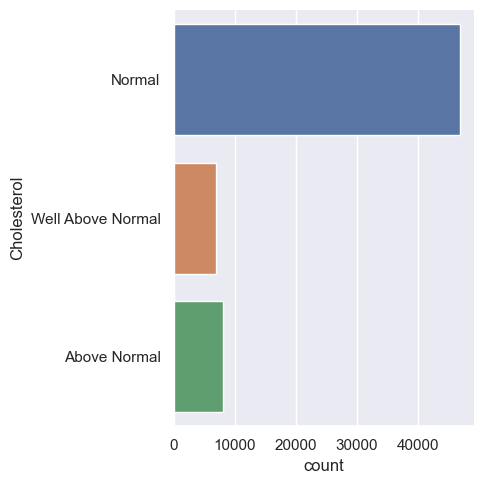

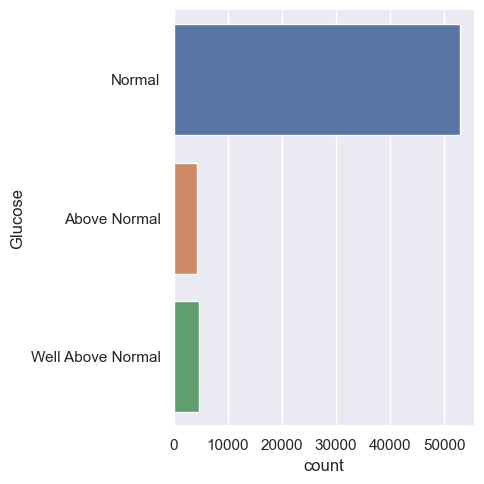

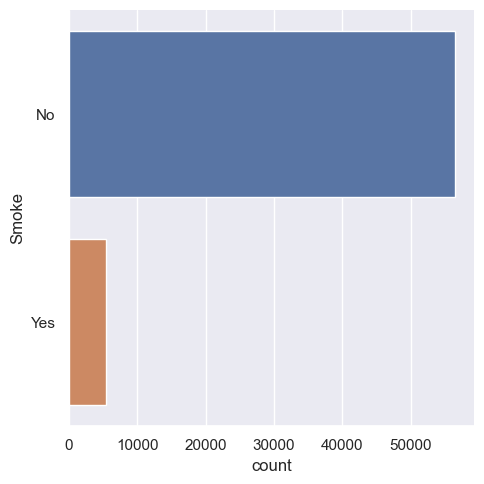

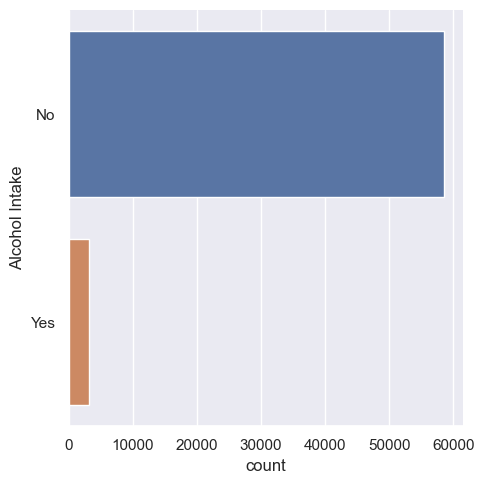

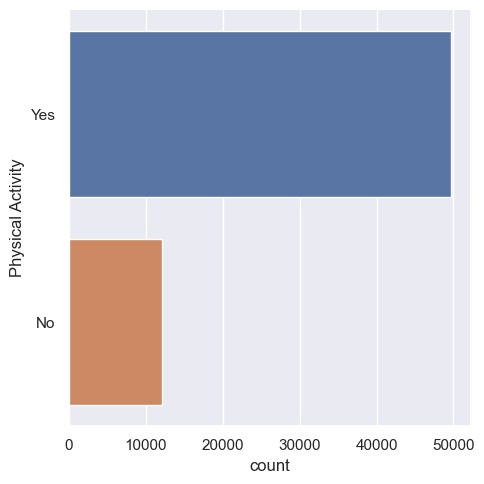

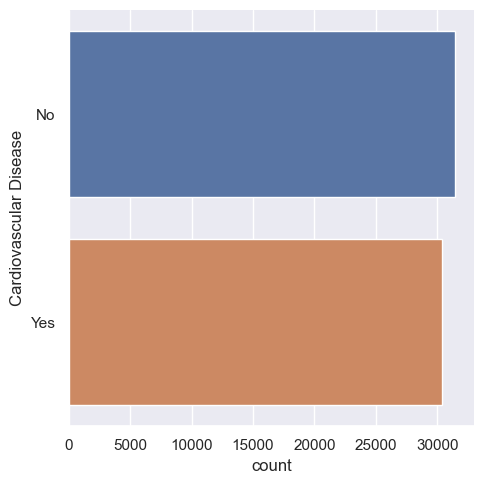

In [18]:
sb.catplot(y = "Age", data = cleaned_cardioData, kind = "count")
sb.catplot(y = "Gender", data = cleaned_cardioData, kind = "count")
sb.catplot(y = "Height", data = cleaned_cardioData, kind = "count")
sb.catplot(y = "Weight", data = cleaned_cardioData, kind = "count")
sb.catplot(y = "BMI", data = cleaned_cardioData, kind = "count")
sb.catplot(y = "Systolic BP", data = cleaned_cardioData, kind = "count")
sb.catplot(y = "Diastolic BP", data = cleaned_cardioData, kind = "count")
sb.catplot(y = "Cholesterol", data = cleaned_cardioData, kind = "count")
sb.catplot(y = "Glucose", data = cleaned_cardioData, kind = "count")
sb.catplot(y = "Smoke", data = cleaned_cardioData, kind = "count")
sb.catplot(y = "Alcohol Intake", data = cleaned_cardioData, kind = "count")
sb.catplot(y = "Physical Activity", data = cleaned_cardioData, kind = "count")
sb.catplot(y = "Cardiovascular Disease", data = cleaned_cardioData, kind = "count")

## 2.3. Heatmap

### 2.3.1. Original Dataset

In [19]:
#Change of data type from categorical to numerical
#Statistical summary of the dataset

cardioData['Gender'].replace(['Women','Men'],[1,2],inplace=True)
cardioData['Smoke'].replace(['No','Yes'],[0,1],inplace=True)
cardioData['Cholesterol'].replace(['Normal','Above Normal','Well Above Normal'],[1,2,3],inplace=True)
cardioData['Glucose'].replace(['Normal','Above Normal', 'Well Above Normal'],[1,2,3],inplace=True)
cardioData['Physical Activity'].replace(['No','Yes'],[0,1],inplace=True)
cardioData['Cardiovascular Disease'].replace(['No','Yes'],[0,1],inplace=True)
cardioData['Alcohol Intake'].replace(['No','Yes'],[0,1],inplace=True)

cleaned_cardioData.describe()

Age        Height        Weight           BMI   Systolic BP  \
count  61784.000000  61784.000000  61784.000000  61784.000000  61784.000000   
mean      52.888402      1.645170     72.873852     26.952457    126.321960   
std        6.744866      0.074891     11.988992      4.313780     14.254517   
min       39.000000      1.430000     40.000000     14.530000     90.000000   
25%       48.000000      1.590000     65.000000     23.877500    120.000000   
50%       54.000000      1.650000     71.000000     26.170000    120.000000   
75%       58.000000      1.700000     80.000000     29.710000    140.000000   
max       64.000000      1.860000    107.000000     39.730000    170.000000   

       Diastolic BP  
count  61784.000000  
mean      81.653810  
std        7.654028  
min       65.000000  
25%       80.000000  
50%       80.000000  
75%       90.000000  
max      105.000000

<AxesSubplot:>

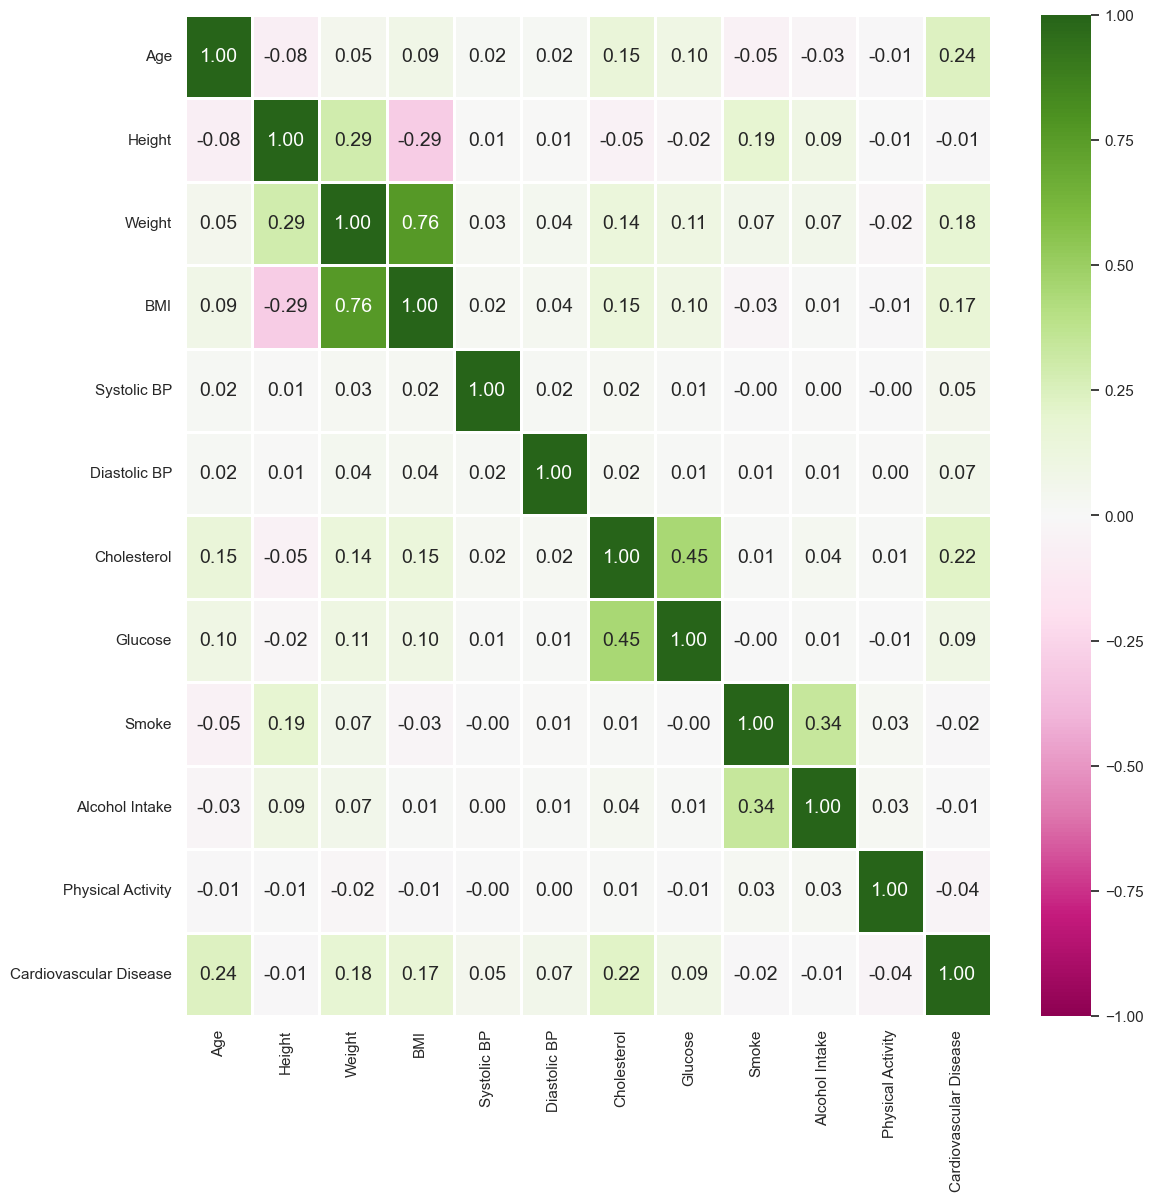

In [20]:
f, axes = plt.subplots(1, 1, figsize=(13, 13))
sb.heatmap(cardioData.corr(), vmin = -1, vmax = 1,  linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 14}, cmap = "PiYG")

### 2.3.2. Cleaned Dataset

In [21]:
#Change of data type from categorical to numerical
#Statistical summary of the dataset

cleaned_cardioData['Gender'].replace(['Women','Men'],[1,2],inplace=True)
cleaned_cardioData['Smoke'].replace(['No','Yes'],[0,1],inplace=True)
cleaned_cardioData['Cholesterol'].replace(['Normal','Above Normal','Well Above Normal'],[1,2,3],inplace=True)
cleaned_cardioData['Glucose'].replace(['Normal','Above Normal', 'Well Above Normal'],[1,2,3],inplace=True)
cleaned_cardioData['Physical Activity'].replace(['No','Yes'],[0,1],inplace=True)
cleaned_cardioData['Cardiovascular Disease'].replace(['No','Yes'],[0,1],inplace=True)
cleaned_cardioData['Alcohol Intake'].replace(['No','Yes'],[0,1],inplace=True)

cleaned_cardioData.describe()

Age        Height        Weight           BMI   Systolic BP  \
count  61784.000000  61784.000000  61784.000000  61784.000000  61784.000000   
mean      52.888402      1.645170     72.873852     26.952457    126.321960   
std        6.744866      0.074891     11.988992      4.313780     14.254517   
min       39.000000      1.430000     40.000000     14.530000     90.000000   
25%       48.000000      1.590000     65.000000     23.877500    120.000000   
50%       54.000000      1.650000     71.000000     26.170000    120.000000   
75%       58.000000      1.700000     80.000000     29.710000    140.000000   
max       64.000000      1.860000    107.000000     39.730000    170.000000   

       Diastolic BP   Cholesterol       Glucose         Smoke  Alcohol Intake  \
count  61784.000000  61784.000000  61784.000000  61784.000000    61784.000000   
mean      81.653810      1.354266      1.219264      0.087142        0.052295   
std        7.654028      0.672429      0.566144      0.282046        0.222623   
min       65.000000      1.000000      1.000000      0.000000        0.000000   
25%       80.000000      1.000000      1.000000      0.000000        0.000000   
50%       80.000000      1.000000      1.000000      0.000000        0.000000   
75%       90.000000      1.000000      1.000000      0.000000        0.000000   
max      105.000000      3.000000      3.000000      1.000000        1.000000   

       Physical Activity  Cardiovascular Disease  
count       61784.000000            61784.000000  
mean            0.804723                0.491551  
std             0.396417                0.499933  
min             0.000000                0.000000  
25%             1.000000                0.000000  
50%             1.000000                0.000000  
75%             1.000000                1.000000  
max             1.000000                1.000000

<AxesSubplot:>

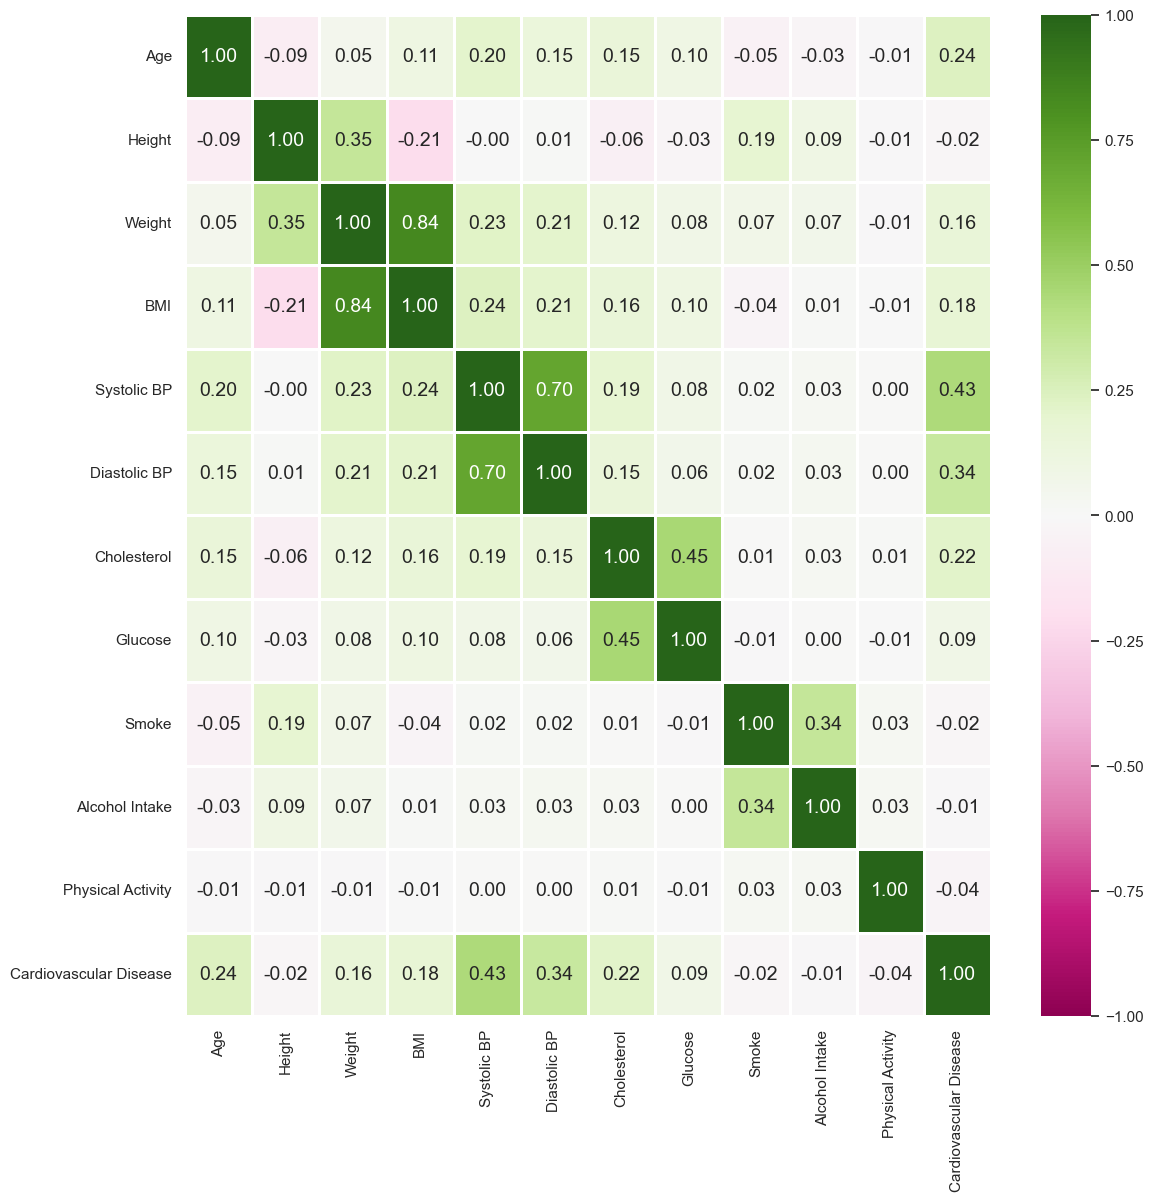

In [22]:
f, axes = plt.subplots(1, 1, figsize=(13, 13))
sb.heatmap(cleaned_cardioData.corr(), vmin = -1, vmax = 1,  linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 14}, cmap = "PiYG")

# 3. Machine Learning

In [23]:
cardioData

Age  Gender  Height  Weight    BMI  Systolic BP  Diastolic BP  \
0       50    Male    1.68    62.0  21.97          110            80   
1       55  Female    1.56    85.0  34.93          140            90   
2       51  Female    1.65    64.0  23.51          130            70   
3       48    Male    1.69    82.0  28.71          150           100   
4       47  Female    1.56    56.0  23.01          100            60   
...    ...     ...     ...     ...    ...          ...           ...   
69995   52    Male    1.68    76.0  26.93          120            80   
69996   61  Female    1.58   126.0  50.47          140            90   
69997   52    Male    1.83   105.0  31.35          180            90   
69998   61  Female    1.63    72.0  27.10          135            80   
69999   56  Female    1.70    72.0  24.91          120            80   

       Cholesterol  Glucose  Smoke  Alcohol Intake  Physical Activity  \
0                1        1      0               0                  1   
1                3        1      0               0                  1   
2                3        1      0               0                  0   
3                1        1      0               0                  1   
4                1        1      0               0                  0   
...            ...      ...    ...             ...                ...   
69995            1        1      1               0                  1   
69996            2        2      0               0                  1   
69997            3        1      0               1                  0   
69998            1        2      0               0                  0   
69999            2        1      0               0                  1   

       Cardiovascular Disease  
0                           0  
1                           1  
2                           1  
3                           1  
4                           0  
...                       ...  
69995                       0  
69996                       1  
69997                       1  
69998                       1  
69999                       0  

[70000 rows x 13 columns]

In [24]:
cleaned_cardioData

Age  Gender  Height  Weight    BMI  Systolic BP  Diastolic BP  \
0       50    Male    1.68    62.0  21.97          110            80   
1       55  Female    1.56    85.0  34.93          140            90   
2       51  Female    1.65    64.0  23.51          130            70   
3       48    Male    1.69    82.0  28.71          150           100   
4       60  Female    1.51    67.0  29.38          120            80   
...    ...     ...     ...     ...    ...          ...           ...   
61779   53  Female    1.72    70.0  23.66          130            90   
61780   57  Female    1.65    80.0  29.38          150            80   
61781   52    Male    1.68    76.0  26.93          120            80   
61782   61  Female    1.63    72.0  27.10          135            80   
61783   56  Female    1.70    72.0  24.91          120            80   

       Cholesterol  Glucose  Smoke  Alcohol Intake  Physical Activity  \
0                1        1      0               0                  1   
1                3        1      0               0                  1   
2                3        1      0               0                  0   
3                1        1      0               0                  1   
4                2        2      0               0                  0   
...            ...      ...    ...             ...                ...   
61779            1        1      0               0                  1   
61780            1        1      0               0                  1   
61781            1        1      1               0                  1   
61782            1        2      0               0                  0   
61783            2        1      0               0                  1   

       Cardiovascular Disease  
0                           0  
1                           1  
2                           1  
3                           1  
4                           0  
...                       ...  
61779                       1  
61780                       1  
61781                       0  
61782                       1  
61783                       0  

[61784 rows x 13 columns]

## 3.1. Logistic Regression

### 3.1.1. Weight vs Presence of cardiovascular disease

Intercept 	: b =  [-1.91884116]
Coefficients 	: a =  [[0.02584782]] 

              precision    recall  f1-score   support

           0       0.57      0.65      0.61     10461
           1       0.59      0.52      0.55     10539

    accuracy                           0.58     21000
   macro avg       0.58      0.58      0.58     21000
weighted avg       0.58      0.58      0.58     21000

AUC-ROC: 0.613691192057171
Accuracy: 0.5808571428571428


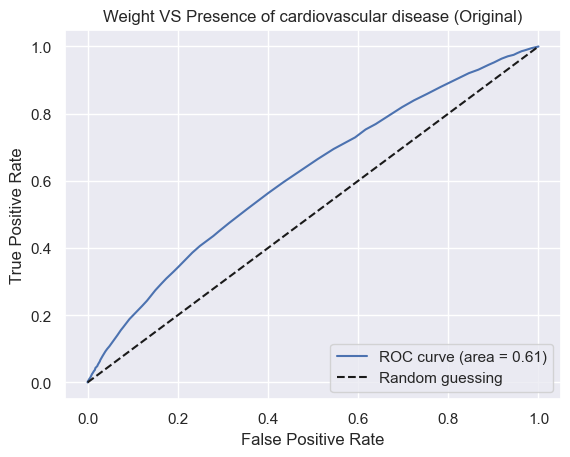

In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc

# Split data into training and testing sets
X = cardioData[['Weight']]
y = cardioData['Cardiovascular Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a logistic regression model to the training data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Intercept \t: b = ', logreg.intercept_)
print('Coefficients \t: a = ', logreg.coef_ ,'\n')

# Predict the target variable on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the performance of the model on the testing data
print(classification_report(y_test, y_pred))
print('AUC-ROC:', roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1]))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

####################
# Predict probabilities for testing set
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute area under ROC curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Weight VS Presence of cardiovascular disease (Original)')
plt.legend(loc="lower right")
plt.show()

Intercept 	: b =  [-2.02151082]
Coefficients 	: a =  [[0.02736509]] 

              precision    recall  f1-score   support

           0       0.57      0.62      0.59      9503
           1       0.56      0.50      0.53      9033

    accuracy                           0.56     18536
   macro avg       0.56      0.56      0.56     18536
weighted avg       0.56      0.56      0.56     18536

AUC-ROC: 0.584230953467601
Accuracy: 0.563929650410013


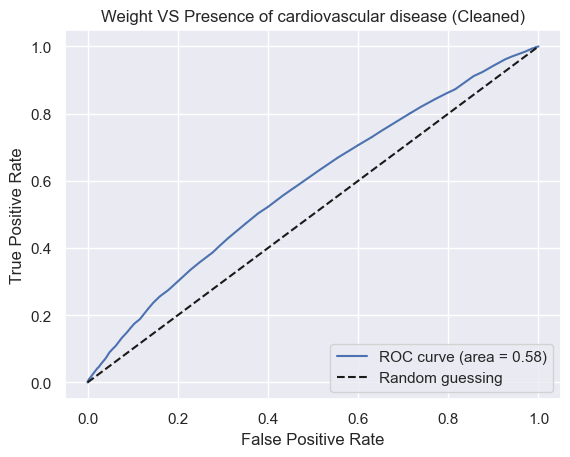

In [26]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc

# Split data into training and testing sets
X = cleaned_cardioData[['Weight']]
y = cleaned_cardioData['Cardiovascular Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a logistic regression model to the training data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Intercept \t: b = ', logreg.intercept_)
print('Coefficients \t: a = ', logreg.coef_ ,'\n')

# Predict the target variable on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the performance of the model on the testing data
print(classification_report(y_test, y_pred))
print('AUC-ROC:', roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1]))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

####################
# Predict probabilities for testing set
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute area under ROC curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Weight VS Presence of cardiovascular disease (Cleaned)')
plt.legend(loc="lower right")
plt.show()

### 3.1.2. BMI vs Presence of cardiovascular disease

Intercept 	: b =  [-1.9407689]
Coefficients 	: a =  [[0.07055603]] 

              precision    recall  f1-score   support

           0       0.58      0.68      0.62     10461
           1       0.61      0.51      0.55     10539

    accuracy                           0.59     21000
   macro avg       0.59      0.59      0.59     21000
weighted avg       0.59      0.59      0.59     21000

AUC-ROC: 0.6222396637326851
Accuracy: 0.5903333333333334


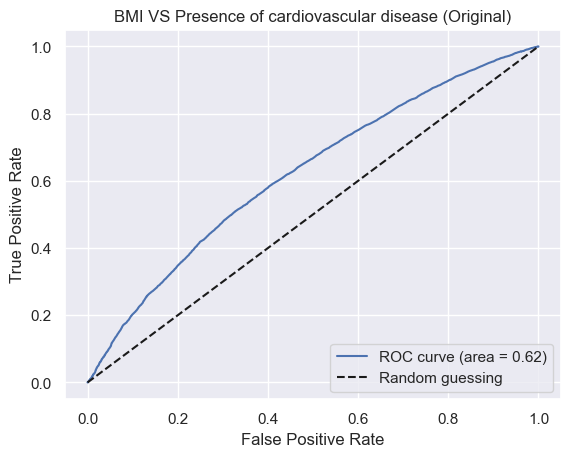

In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc

# Split data into training and testing sets
X = cardioData[['BMI']]
y = cardioData['Cardiovascular Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a logistic regression model to the training data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Intercept \t: b = ', logreg.intercept_)
print('Coefficients \t: a = ', logreg.coef_ ,'\n')

# Predict the target variable on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the performance of the model on the testing data
print(classification_report(y_test, y_pred))
print('AUC-ROC:', roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1]))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

####################
# Predict probabilities for testing set
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute area under ROC curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('BMI VS Presence of cardiovascular disease (Original)')
plt.legend(loc="lower right")
plt.show()

Intercept 	: b =  [-2.33212118]
Coefficients 	: a =  [[0.08554025]] 

              precision    recall  f1-score   support

           0       0.57      0.65      0.61      9503
           1       0.57      0.48      0.52      9033

    accuracy                           0.57     18536
   macro avg       0.57      0.57      0.56     18536
weighted avg       0.57      0.57      0.56     18536

AUC-ROC: 0.5967676728350882
Accuracy: 0.56797583081571


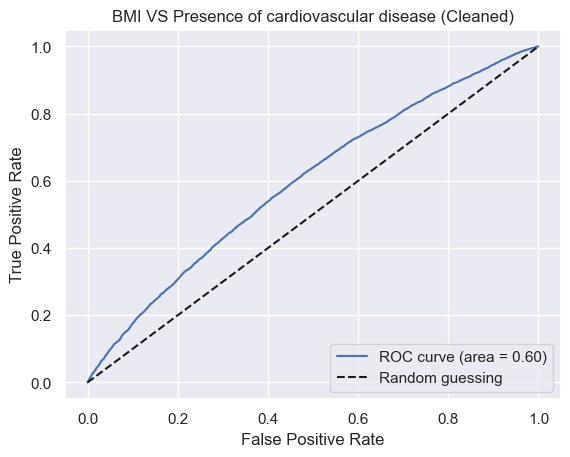

In [28]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc

# Split data into training and testing sets
X = cleaned_cardioData[['BMI']]
y = cleaned_cardioData['Cardiovascular Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a logistic regression model to the training data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Intercept \t: b = ', logreg.intercept_)
print('Coefficients \t: a = ', logreg.coef_ ,'\n')

# Predict the target variable on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the performance of the model on the testing data
print(classification_report(y_test, y_pred))
print('AUC-ROC:', roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1]))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

####################
# Predict probabilities for testing set
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute area under ROC curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('BMI VS Presence of cardiovascular disease (Cleaned)')
plt.legend(loc="lower right")
plt.show()

### 3.1.3. Systolic BP vs Presence of cardiovascular disease

Intercept 	: b =  [-5.6937604]
Coefficients 	: a =  [[0.0450365]] 

              precision    recall  f1-score   support

           0       0.68      0.80      0.74     10461
           1       0.76      0.63      0.69     10539

    accuracy                           0.72     21000
   macro avg       0.72      0.72      0.72     21000
weighted avg       0.72      0.72      0.72     21000

AUC-ROC: 0.7551067439216099
Accuracy: 0.7177619047619047


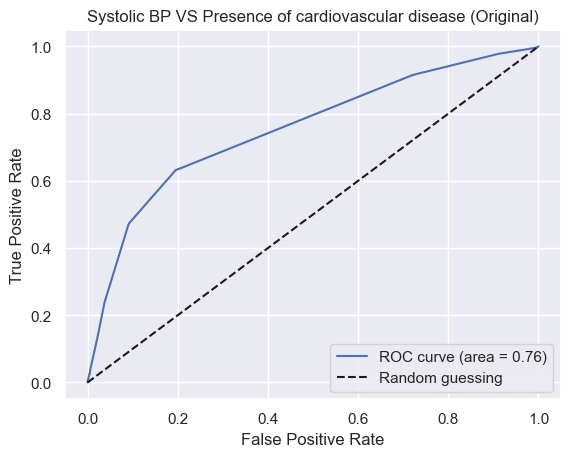

In [29]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc

# Split data into training and testing sets
X = cardioData[['Systolic BP']]
y = cardioData['Cardiovascular Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a logistic regression model to the training data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Intercept \t: b = ', logreg.intercept_)
print('Coefficients \t: a = ', logreg.coef_ ,'\n')

# Predict the target variable on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the performance of the model on the testing data
print(classification_report(y_test, y_pred))
print('AUC-ROC:', roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1]))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

####################
# Predict probabilities for testing set
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute area under ROC curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Systolic BP VS Presence of cardiovascular disease (Original)')
plt.legend(loc="lower right")
plt.show()

Intercept 	: b =  [-9.70092741]
Coefficients 	: a =  [[0.07696742]] 

              precision    recall  f1-score   support

           0       0.68      0.80      0.74      9503
           1       0.74      0.61      0.67      9033

    accuracy                           0.71     18536
   macro avg       0.71      0.70      0.70     18536
weighted avg       0.71      0.71      0.70     18536

AUC-ROC: 0.7420967146326647
Accuracy: 0.7068946914113077


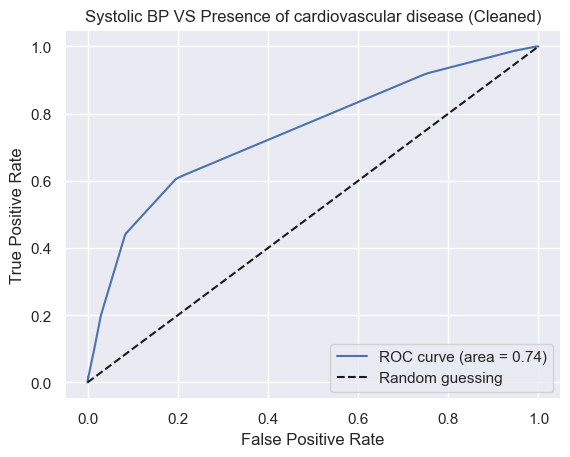

In [30]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc

# Split data into training and testing sets
X = cleaned_cardioData[['Systolic BP']]
y = cleaned_cardioData['Cardiovascular Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a logistic regression model to the training data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Intercept \t: b = ', logreg.intercept_)
print('Coefficients \t: a = ', logreg.coef_ ,'\n')

# Predict the target variable on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the performance of the model on the testing data
print(classification_report(y_test, y_pred))
print('AUC-ROC:', roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1]))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

####################
# Predict probabilities for testing set
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute area under ROC curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Systolic BP VS Presence of cardiovascular disease (Cleaned)')
plt.legend(loc="lower right")
plt.show()

### 3.1.4. Diastolic BP vs Presence of cardiovascular disease

Intercept 	: b =  [-0.17237446]
Coefficients 	: a =  [[0.00182238]] 

              precision    recall  f1-score   support

           0       0.53      0.97      0.69     10461
           1       0.83      0.14      0.24     10539

    accuracy                           0.56     21000
   macro avg       0.68      0.56      0.47     21000
weighted avg       0.68      0.56      0.46     21000

AUC-ROC: 0.6969228573212335
Accuracy: 0.5556190476190476


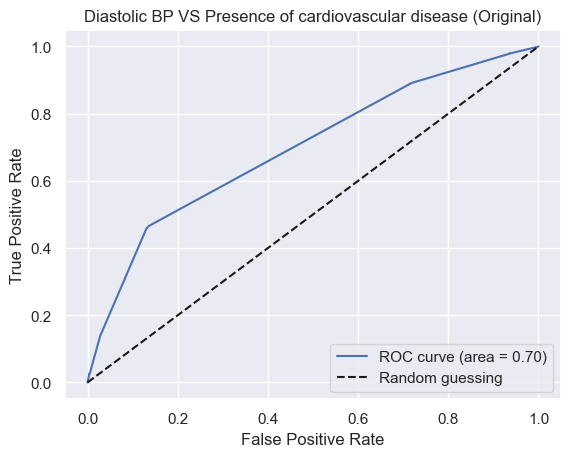

In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc

# Split data into training and testing sets
X = cardioData[['Diastolic BP']]
y = cardioData['Cardiovascular Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a logistic regression model to the training data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Intercept \t: b = ', logreg.intercept_)
print('Coefficients \t: a = ', logreg.coef_ ,'\n')

# Predict the target variable on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the performance of the model on the testing data
print(classification_report(y_test, y_pred))
print('AUC-ROC:', roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1]))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

####################
# Predict probabilities for testing set
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute area under ROC curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Diastolic BP VS Presence of cardiovascular disease (Original)')
plt.legend(loc="lower right")
plt.show()

Intercept 	: b =  [-8.15131333]
Coefficients 	: a =  [[0.09960165]] 

              precision    recall  f1-score   support

           0       0.61      0.86      0.72      9503
           1       0.75      0.43      0.55      9033

    accuracy                           0.65     18536
   macro avg       0.68      0.65      0.63     18536
weighted avg       0.68      0.65      0.63     18536

AUC-ROC: 0.6773027935184843
Accuracy: 0.6515968925334484


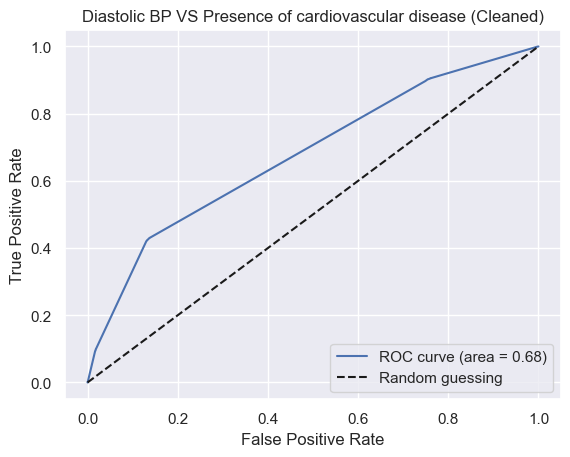

In [32]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc

# Split data into training and testing sets
X = cleaned_cardioData[['Diastolic BP']]
y = cleaned_cardioData['Cardiovascular Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a logistic regression model to the training data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Intercept \t: b = ', logreg.intercept_)
print('Coefficients \t: a = ', logreg.coef_ ,'\n')

# Predict the target variable on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the performance of the model on the testing data
print(classification_report(y_test, y_pred))
print('AUC-ROC:', roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1]))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

####################
# Predict probabilities for testing set
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute area under ROC curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Diastolic BP VS Presence of cardiovascular disease (Cleaned)')
plt.legend(loc="lower right")
plt.show()

### 3.1.5. Cholesterol vs Presence of cardiovascular disease

Intercept 	: b =  [-0.9535015]
Coefficients 	: a =  [[0.70268298]] 

              precision    recall  f1-score   support

           0       0.56      0.84      0.67     10461
           1       0.68      0.33      0.45     10539

    accuracy                           0.59     21000
   macro avg       0.62      0.59      0.56     21000
weighted avg       0.62      0.59      0.56     21000

AUC-ROC: 0.5920792022899471
Accuracy: 0.5861904761904762


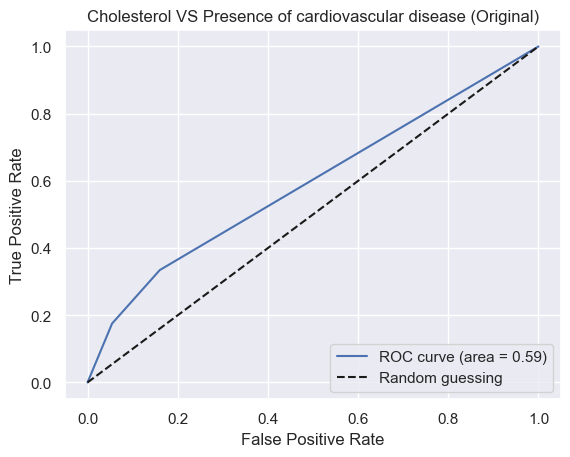

In [33]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc

# Split data into training and testing sets
X = cardioData[['Cholesterol']]
y = cardioData['Cardiovascular Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a logistic regression model to the training data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Intercept \t: b = ', logreg.intercept_)
print('Coefficients \t: a = ', logreg.coef_ ,'\n')

# Predict the target variable on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the performance of the model on the testing data
print(classification_report(y_test, y_pred))
print('AUC-ROC:', roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1]))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

####################
# Predict probabilities for testing set
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute area under ROC curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Cholesterol VS Presence of cardiovascular disease (Original)')
plt.legend(loc="lower right")
plt.show()

Intercept 	: b =  [-0.9628198]
Coefficients 	: a =  [[0.70070073]] 

              precision    recall  f1-score   support

           0       0.57      0.84      0.68      9503
           1       0.66      0.33      0.44      9033

    accuracy                           0.59     18536
   macro avg       0.61      0.58      0.56     18536
weighted avg       0.61      0.59      0.56     18536

AUC-ROC: 0.5885370452738803
Accuracy: 0.5897712559343979


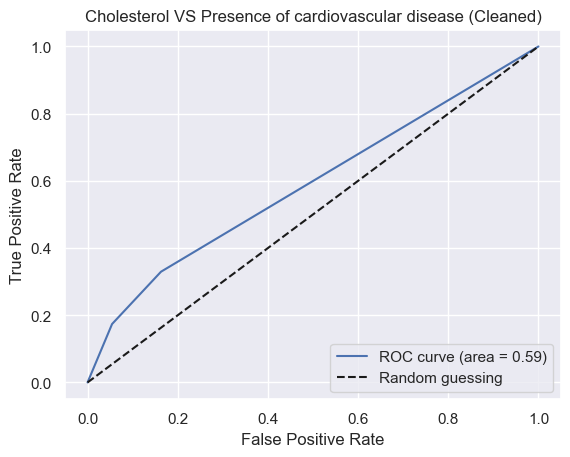

In [34]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc

# Split data into training and testing sets
X = cleaned_cardioData[['Cholesterol']]
y = cleaned_cardioData['Cardiovascular Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a logistic regression model to the training data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Intercept \t: b = ', logreg.intercept_)
print('Coefficients \t: a = ', logreg.coef_ ,'\n')

# Predict the target variable on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the performance of the model on the testing data
print(classification_report(y_test, y_pred))
print('AUC-ROC:', roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1]))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

####################
# Predict probabilities for testing set
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute area under ROC curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Cholesterol VS Presence of cardiovascular disease (Cleaned)')
plt.legend(loc="lower right")
plt.show()

### 3.1.6. Glucose vs Presence of cardiovascular disease

Intercept 	: b =  [-0.40398976]
Coefficients 	: a =  [[0.32674231]] 

              precision    recall  f1-score   support

           0       0.52      0.88      0.65     10461
           1       0.60      0.18      0.28     10539

    accuracy                           0.53     21000
   macro avg       0.56      0.53      0.47     21000
weighted avg       0.56      0.53      0.46     21000

AUC-ROC: 0.5312173059548513
Accuracy: 0.5296190476190477


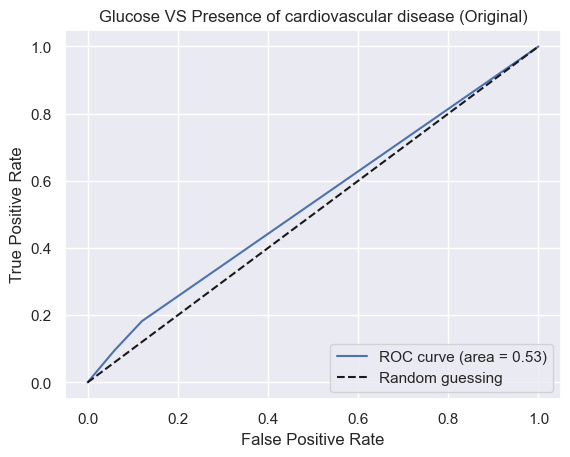

In [35]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc

# Split data into training and testing sets
X = cardioData[['Glucose']]
y = cardioData['Cardiovascular Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a logistic regression model to the training data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Intercept \t: b = ', logreg.intercept_)
print('Coefficients \t: a = ', logreg.coef_ ,'\n')

# Predict the target variable on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the performance of the model on the testing data
print(classification_report(y_test, y_pred))
print('AUC-ROC:', roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1]))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

####################
# Predict probabilities for testing set
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute area under ROC curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Glucose VS Presence of cardiovascular disease (Original)')
plt.legend(loc="lower right")
plt.show()

Intercept 	: b =  [-0.4131418]
Coefficients 	: a =  [[0.31779931]] 

              precision    recall  f1-score   support

           0       0.53      0.88      0.66      9503
           1       0.58      0.17      0.26      9033

    accuracy                           0.54     18536
   macro avg       0.55      0.53      0.46     18536
weighted avg       0.55      0.54      0.47     18536

AUC-ROC: 0.5270790398375482
Accuracy: 0.5354445403539059


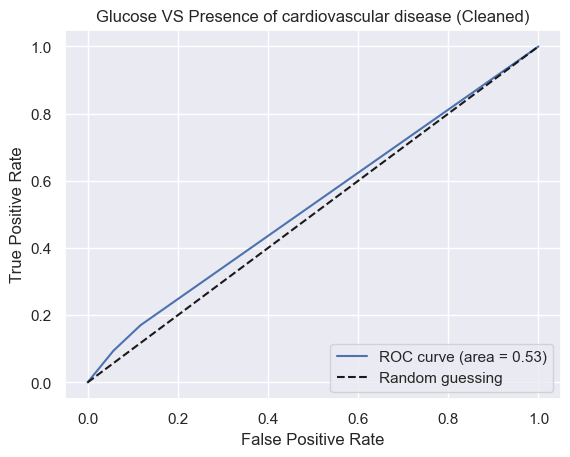

In [36]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc

# Split data into training and testing sets
X = cleaned_cardioData[['Glucose']]
y = cleaned_cardioData['Cardiovascular Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a logistic regression model to the training data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Intercept \t: b = ', logreg.intercept_)
print('Coefficients \t: a = ', logreg.coef_ ,'\n')

# Predict the target variable on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the performance of the model on the testing data
print(classification_report(y_test, y_pred))
print('AUC-ROC:', roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1]))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

####################
# Predict probabilities for testing set
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute area under ROC curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Glucose VS Presence of cardiovascular disease (Cleaned)')
plt.legend(loc="lower right")
plt.show()

## 3.2. K-Means Clustering

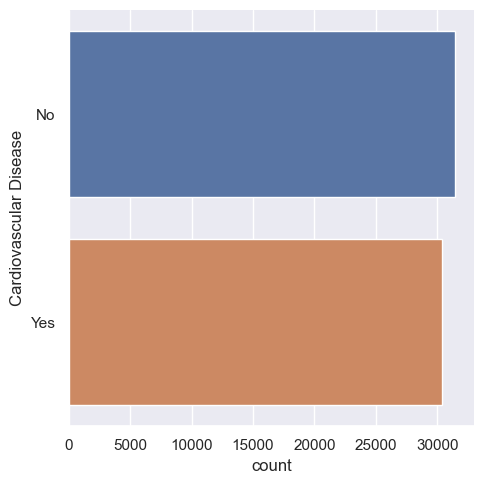

In [37]:
cleaned_cardioData['Gender'].replace(['Women','Men'],[1,2],inplace=True)
cleaned_cardioData['Smoke'].replace(['No','Yes'],[0,1],inplace=True)
cleaned_cardioData['Cholesterol'].replace(['Normal','Above Normal','Well Above Normal'],[1,2,3],inplace=True)
cleaned_cardioData['Glucose'].replace(['Normal','Above Normal', 'Well Above Normal'],[1,2,3],inplace=True)
cleaned_cardioData['Physical Activity'].replace(['No','Yes'],[0,1],inplace=True)
cleaned_cardioData['Alcohol Intake'].replace(['No','Yes'],[0,1],inplace=True)
cleaned_cardioData['Cardiovascular Disease'].replace([0,1],['No','Yes'],inplace=True)

# Extract the Features from the Data
k_data = pd.DataFrame(cleaned_cardioData[['Age', 'Weight', 'BMI', 'Systolic BP', 'Diastolic BP', 'Cardiovascular Disease']]) 

sb.catplot(y = "Cardiovascular Disease", data = k_data, kind = "count")

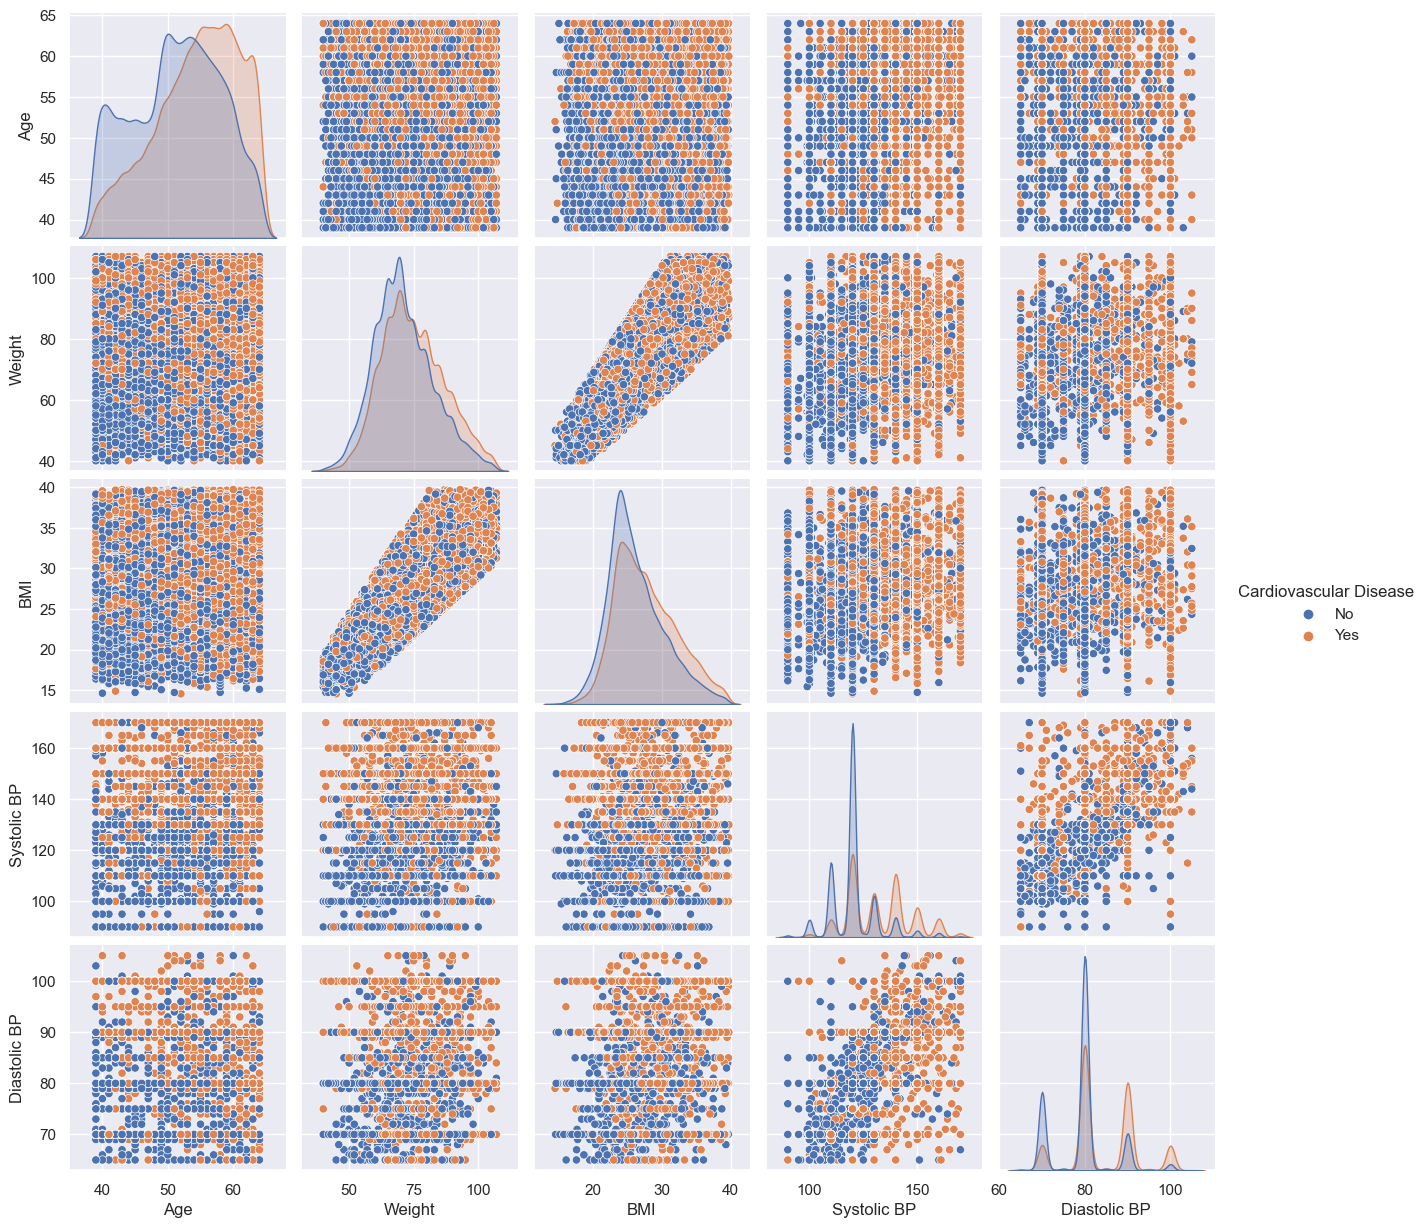

In [38]:
# Draw pairs of variables against one another
sb.pairplot(data = k_data, hue = "Cardiovascular Disease")

<AxesSubplot:xlabel='Diastolic BP', ylabel='Cardiovascular Disease'>

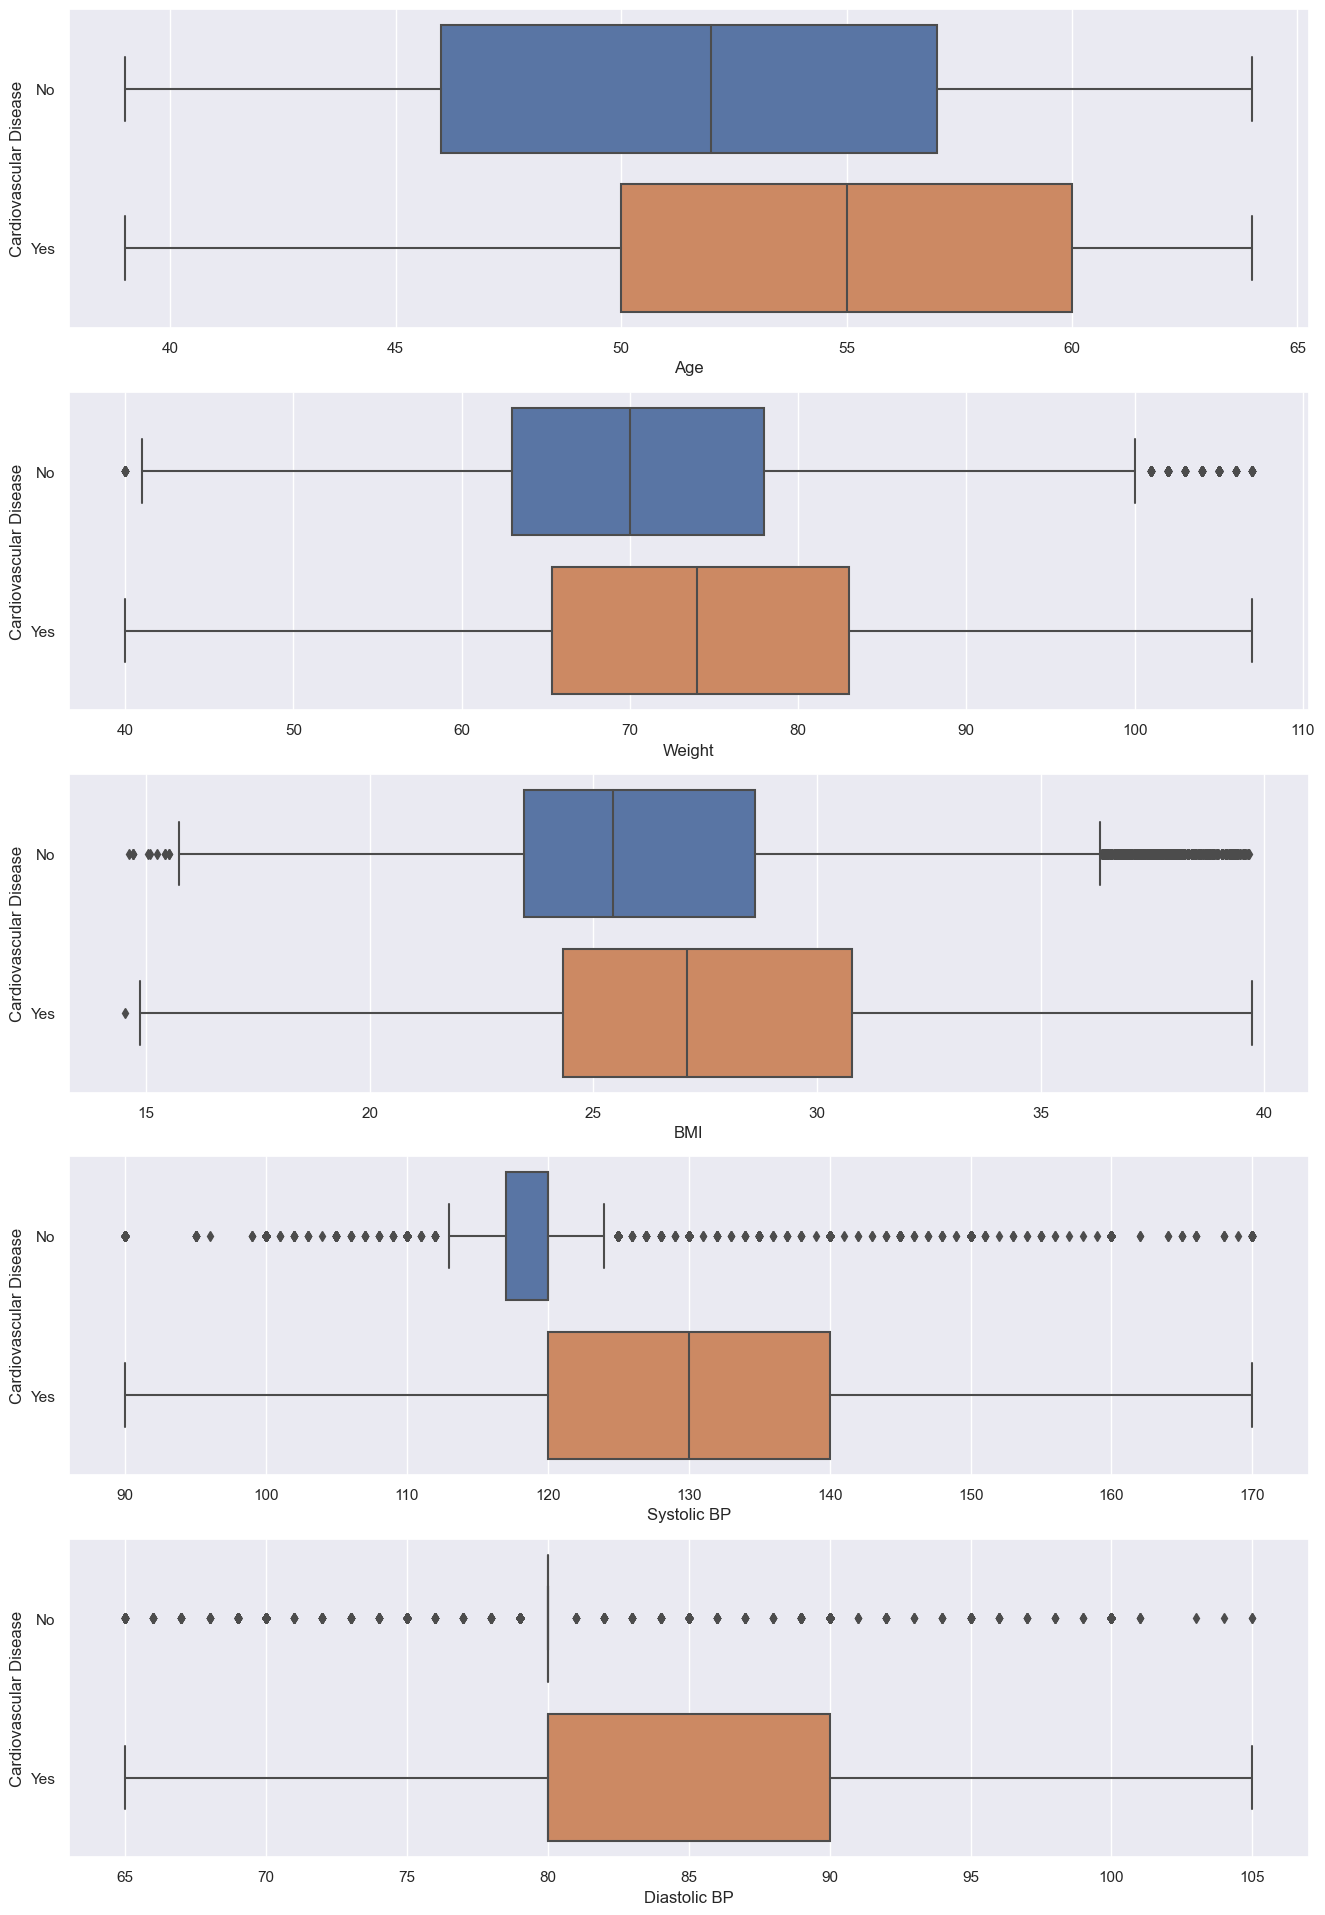

In [39]:
# Boxplots for all Numerical Features against the Clusters
f, axes = plt.subplots(5, 1, figsize=(16,24))
sb.boxplot(x = 'Age', y = 'Cardiovascular Disease', data = k_data, ax = axes[0])
sb.boxplot(x = 'Weight', y = 'Cardiovascular Disease', data = k_data, ax = axes[1])
sb.boxplot(x = 'BMI', y = 'Cardiovascular Disease', data = k_data, ax = axes[2])
sb.boxplot(x = 'Systolic BP', y = 'Cardiovascular Disease', data = k_data, ax = axes[3])
sb.boxplot(x = 'Diastolic BP', y = 'Cardiovascular Disease', data = k_data, ax = axes[4])

<AxesSubplot:xlabel='Cardiovascular Disease'>

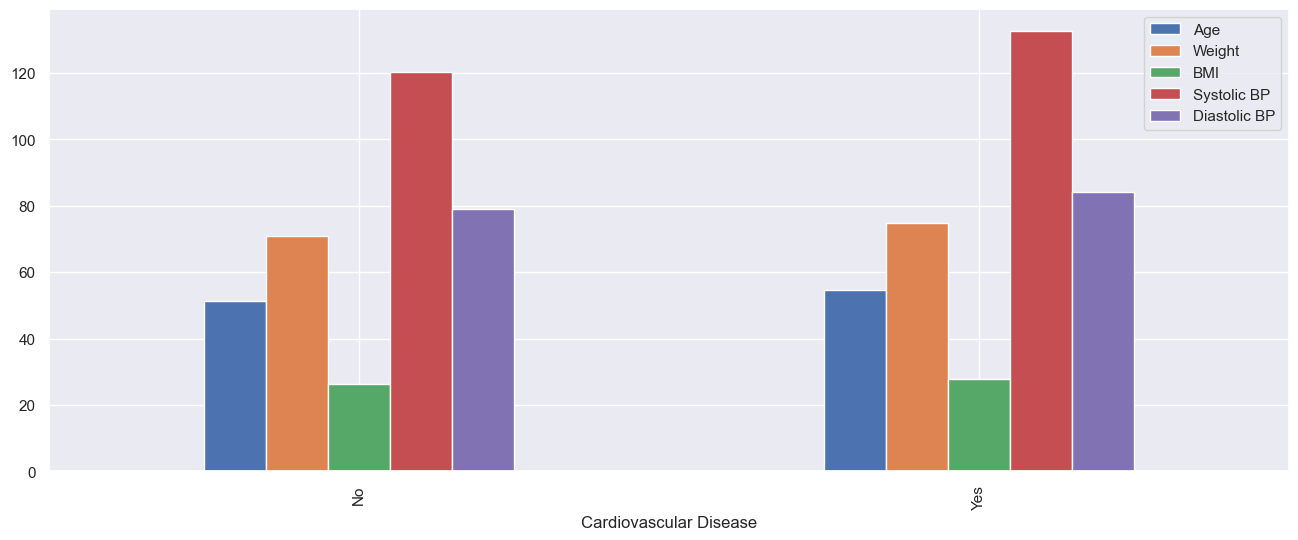

In [40]:
# Average Behaviour of each Cluster
cluster_data = pd.DataFrame(k_data.groupby(by = "Cardiovascular Disease").mean())
cluster_data.plot.bar(figsize = (16,6))

## 3.3. Decision Trees and Random Forest

### 3.3.1. Decision Trees (Original Dataset)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7260238095238095

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7254285714285714



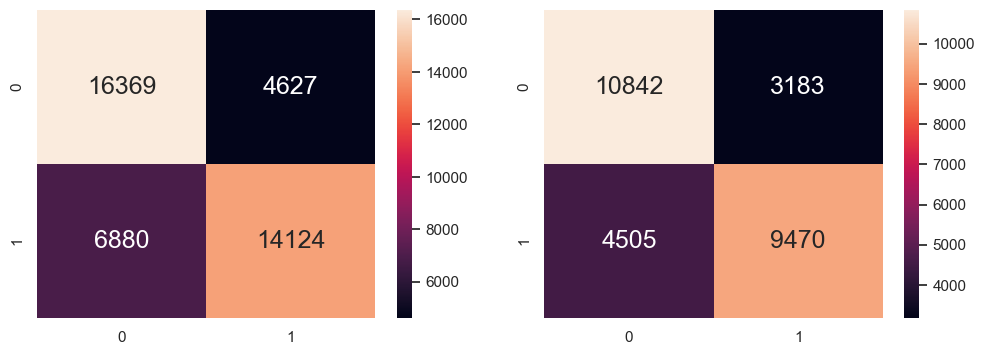

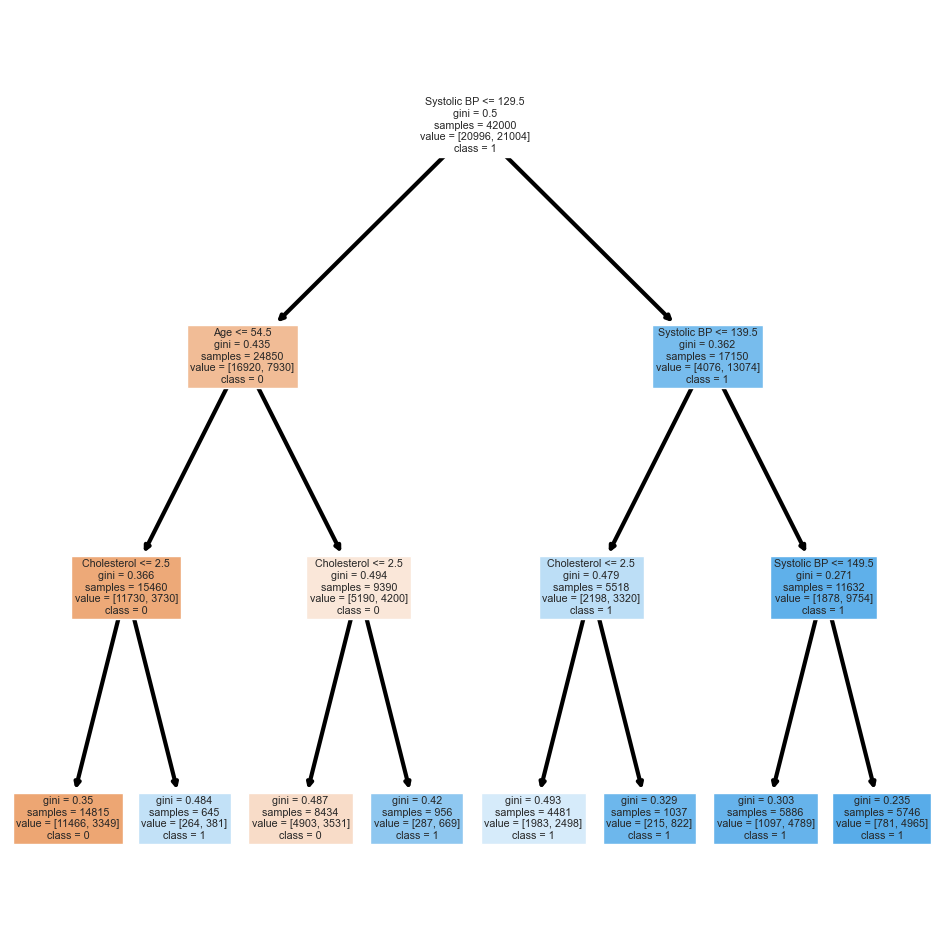

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

y = pd.DataFrame(cardioData["Cardiovascular Disease"])
X = pd.DataFrame(cardioData[["Age", "Weight", "BMI", "Systolic BP", "Diastolic BP", "Cholesterol"]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

dectree = DecisionTreeClassifier(max_depth = 3) 
dectree.fit(X_train, y_train)                   

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()


f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5985952380952381

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5963928571428572



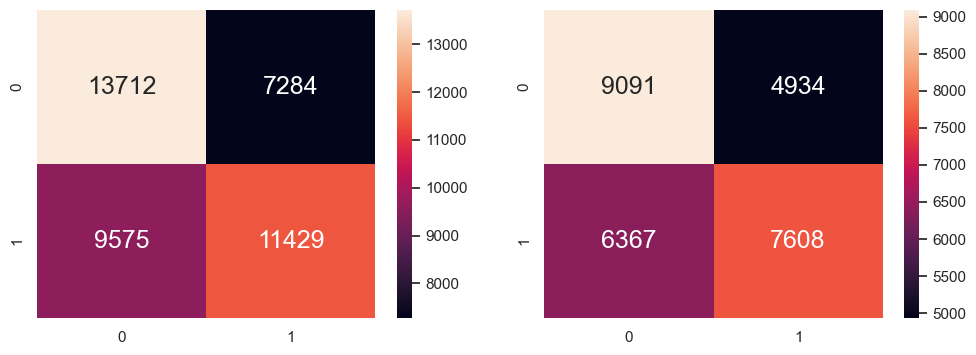

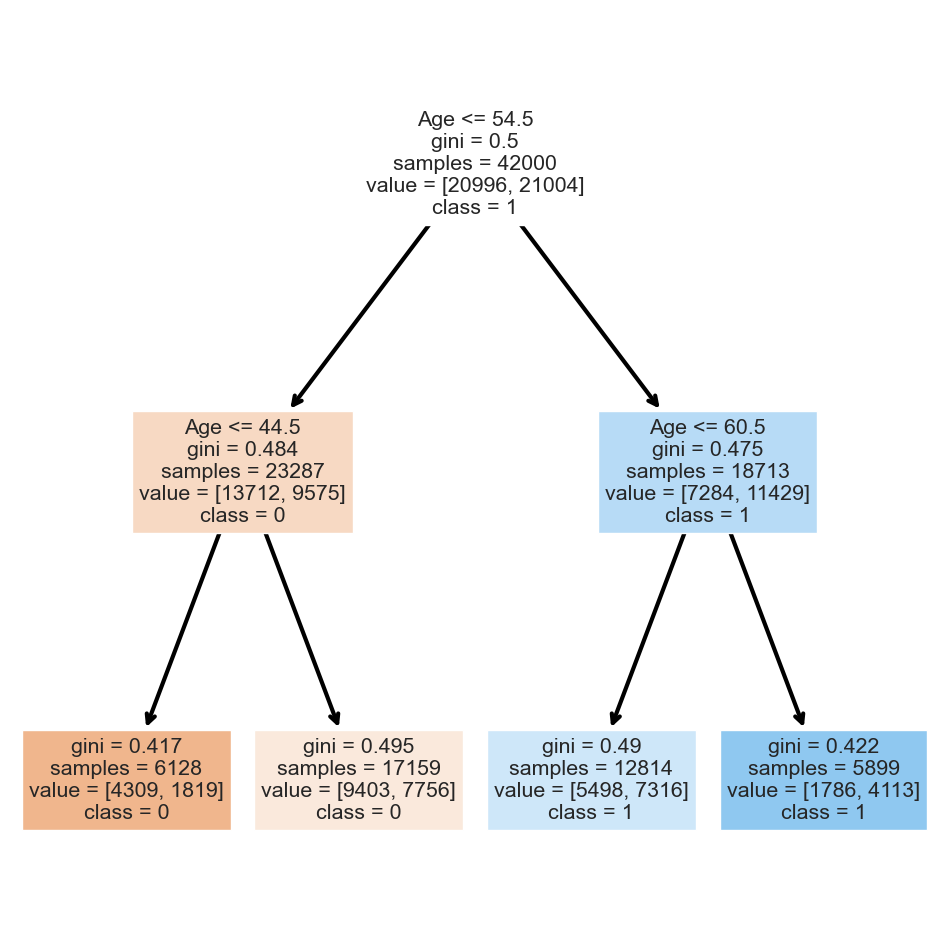

In [42]:
y = pd.DataFrame(cardioData["Cardiovascular Disease"])
X = pd.DataFrame(cardioData[["Age"]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

dectree = DecisionTreeClassifier(max_depth = 2) 
dectree.fit(X_train, y_train)                   

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()


f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5727857142857142

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.57225



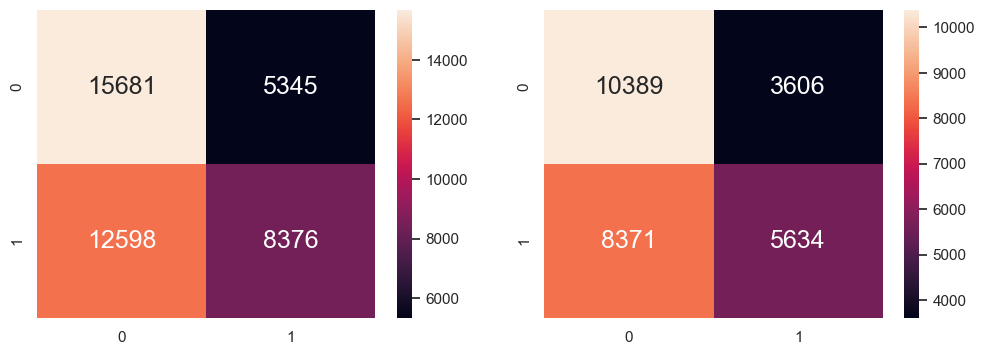

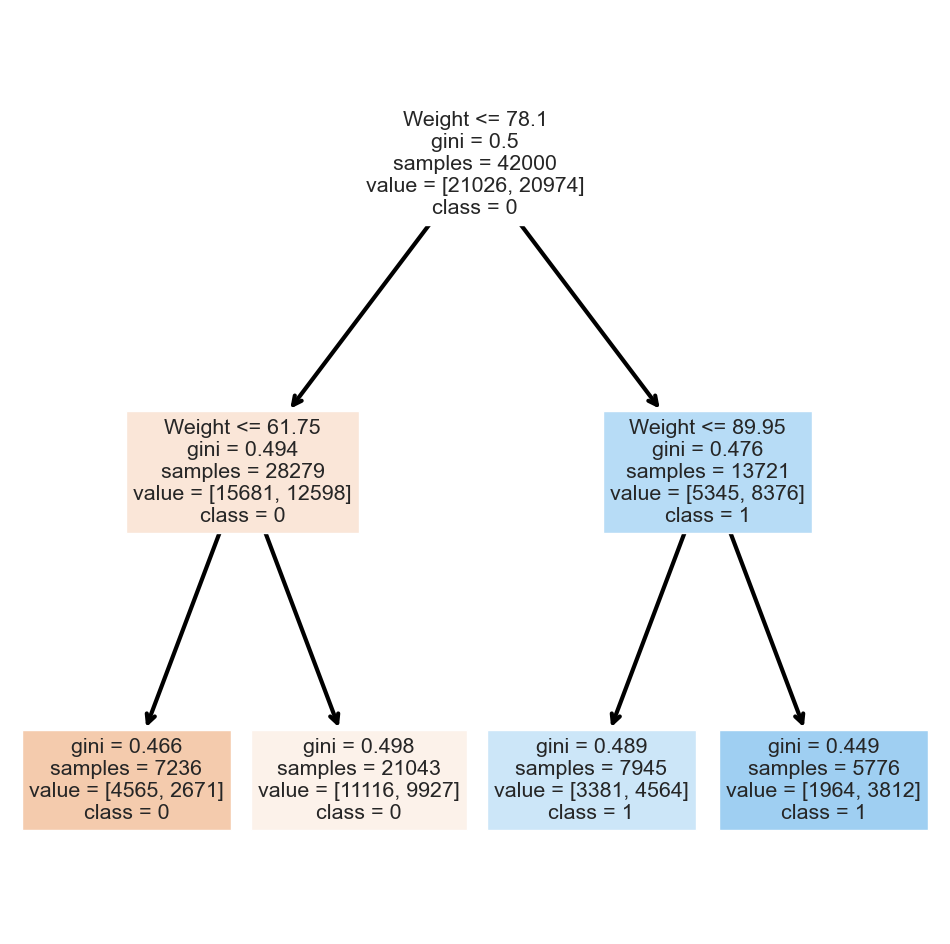

In [43]:
y = pd.DataFrame(cardioData["Cardiovascular Disease"])
X = pd.DataFrame(cardioData[["Weight"]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

dectree = DecisionTreeClassifier(max_depth = 2) 
dectree.fit(X_train, y_train)                   

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()


f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5840714285714286

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5816785714285714



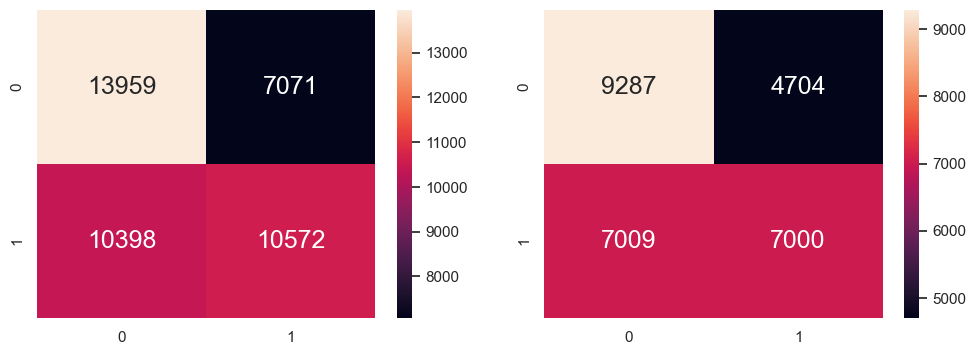

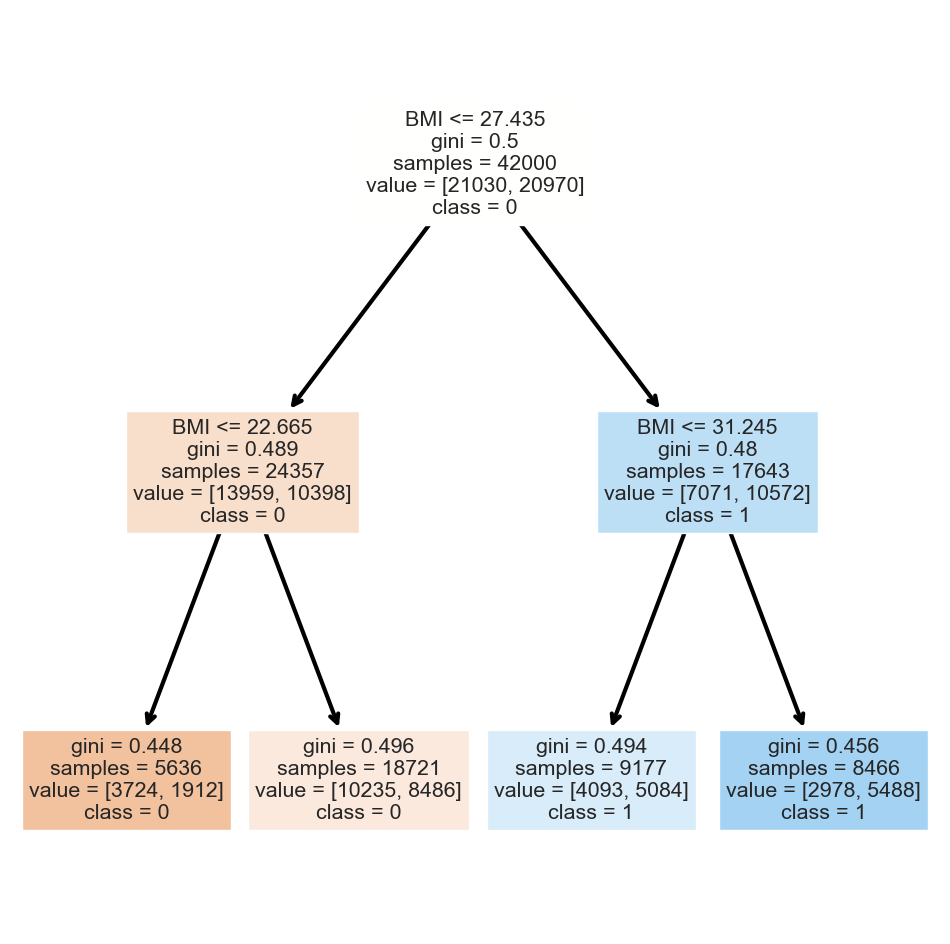

In [44]:
y = pd.DataFrame(cardioData["Cardiovascular Disease"])
X = pd.DataFrame(cardioData[["BMI"]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

dectree = DecisionTreeClassifier(max_depth = 2) 
dectree.fit(X_train, y_train)                   

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()


f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7134761904761905

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7145357142857143



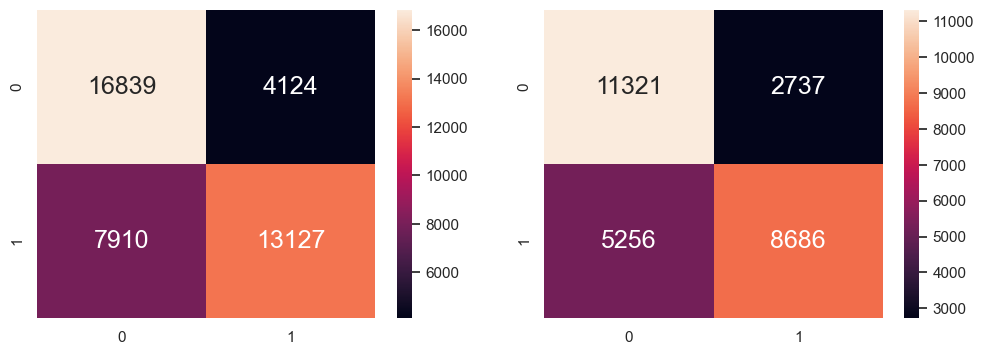

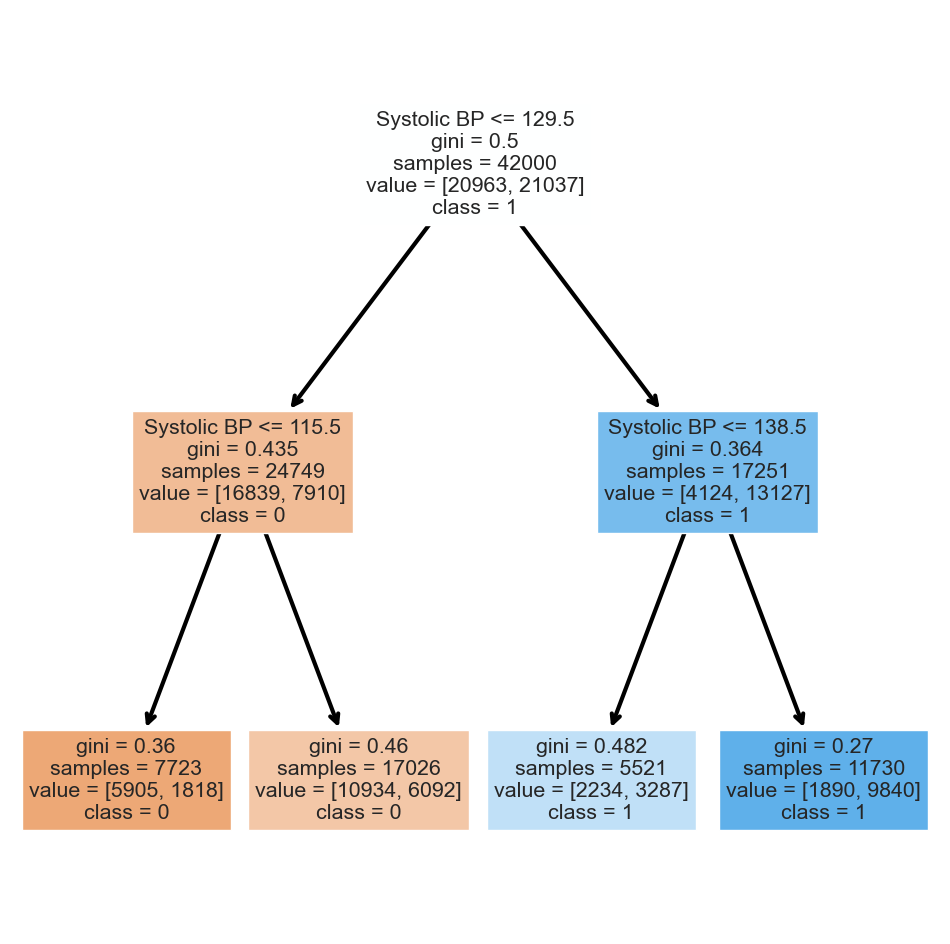

In [45]:
y = pd.DataFrame(cardioData["Cardiovascular Disease"])
X = pd.DataFrame(cardioData[["Systolic BP"]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

dectree = DecisionTreeClassifier(max_depth = 2) 
dectree.fit(X_train, y_train)                   

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()


f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6610952380952381

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6617857142857143



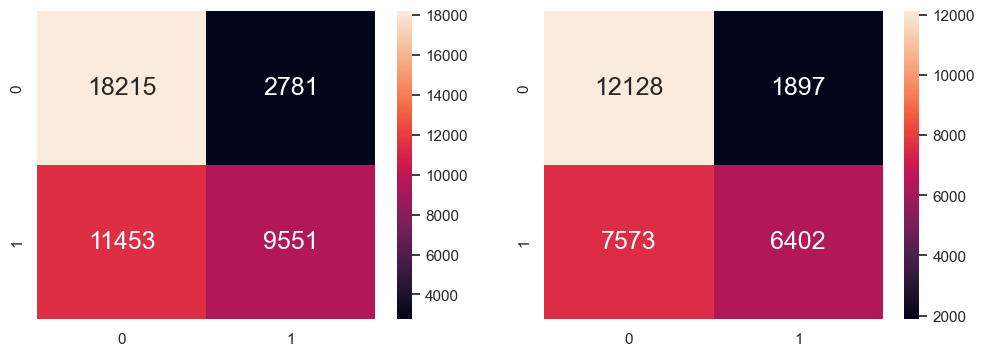

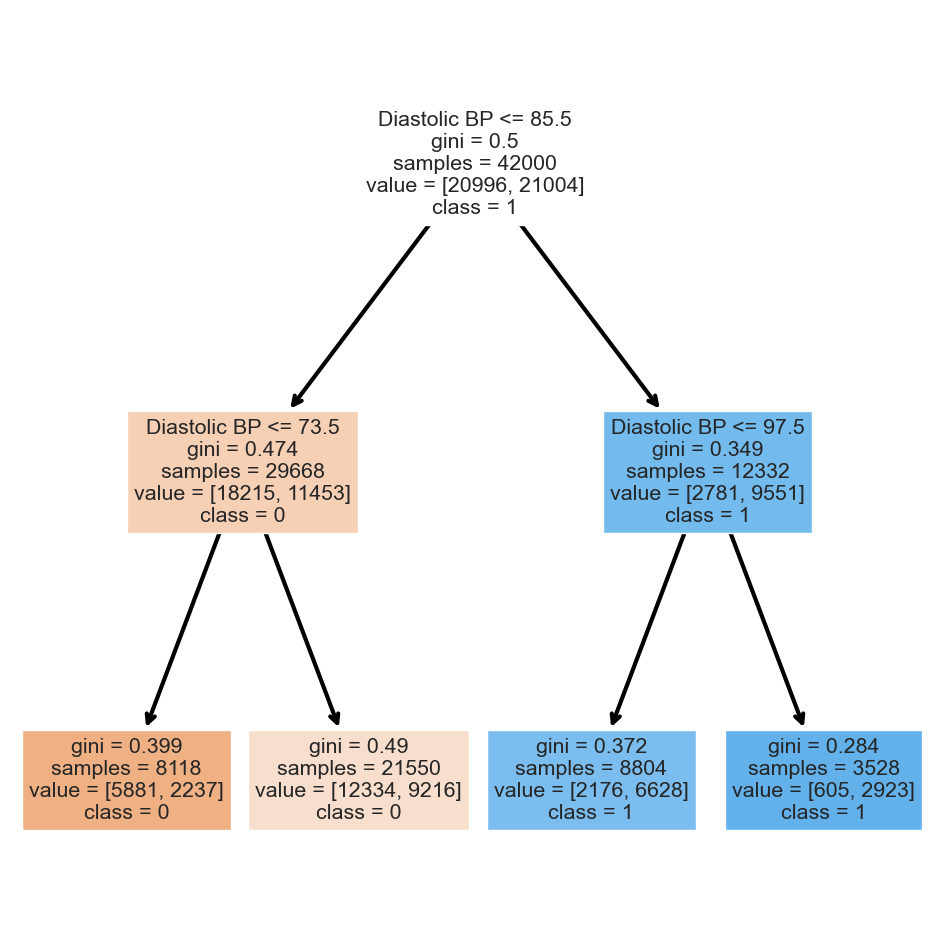

In [46]:
y = pd.DataFrame(cardioData["Cardiovascular Disease"])
X = pd.DataFrame(cardioData[["Diastolic BP"]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

dectree = DecisionTreeClassifier(max_depth = 2) 
dectree.fit(X_train, y_train)                   

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()


f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5906666666666667

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5873571428571429



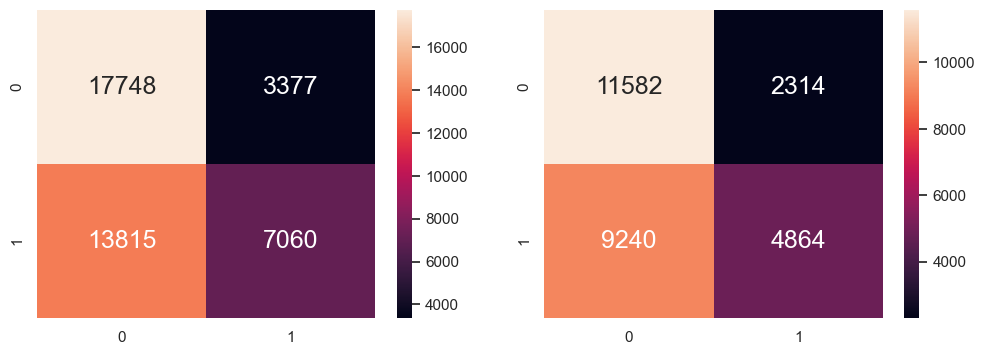

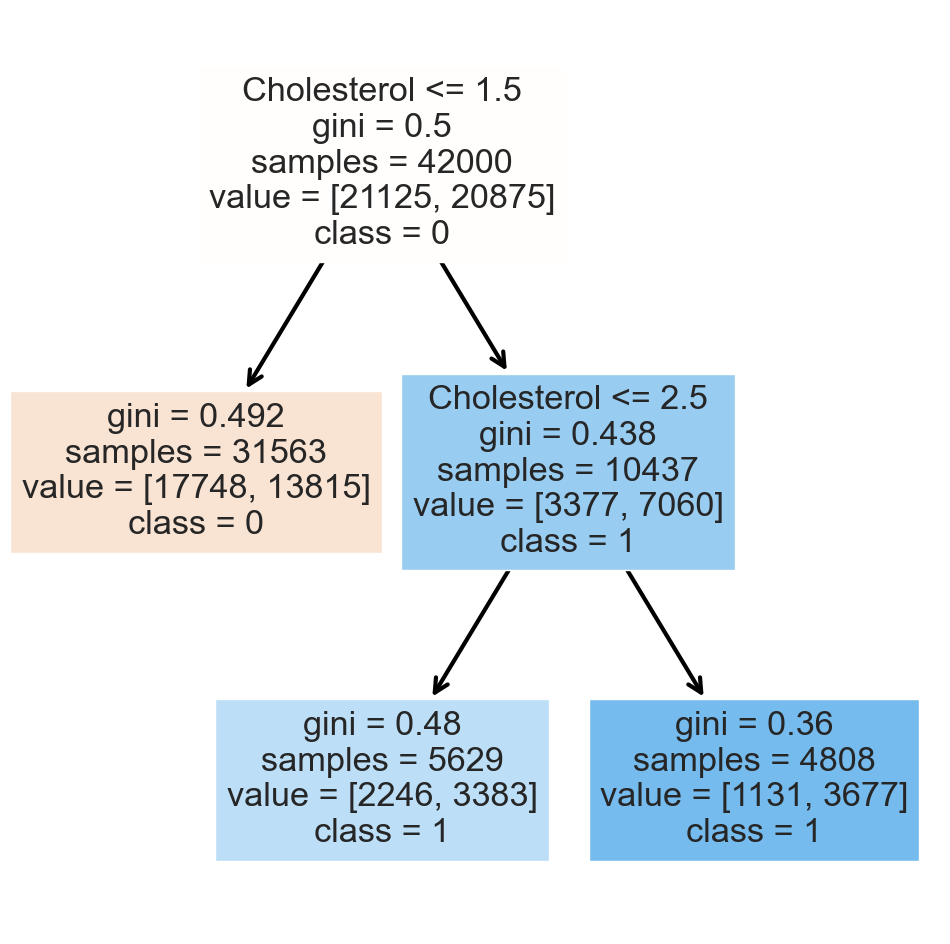

In [47]:
y = pd.DataFrame(cardioData["Cardiovascular Disease"])
X = pd.DataFrame(cardioData[["Cholesterol"]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

dectree = DecisionTreeClassifier(max_depth = 2) 
dectree.fit(X_train, y_train)                   

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()


f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

### 3.3.2. Random Forest (Original Dataset)

C:\Users\phuaw\AppData\Local\Temp\ipykernel_19916\782787419.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)  # train the random forest model


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7248809523809524

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7275357142857143



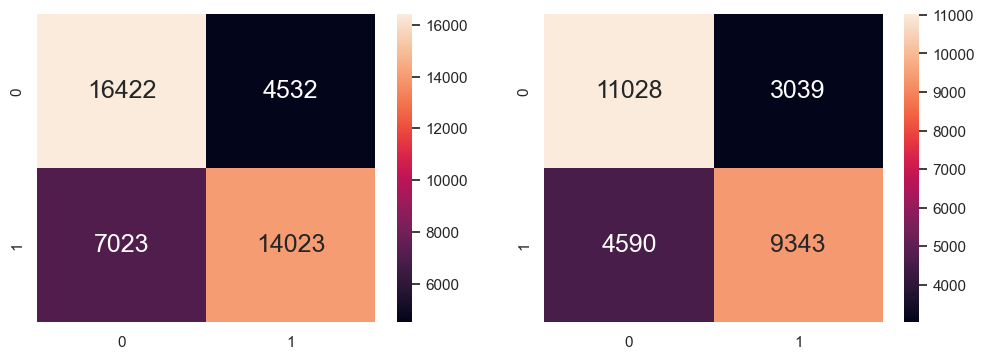

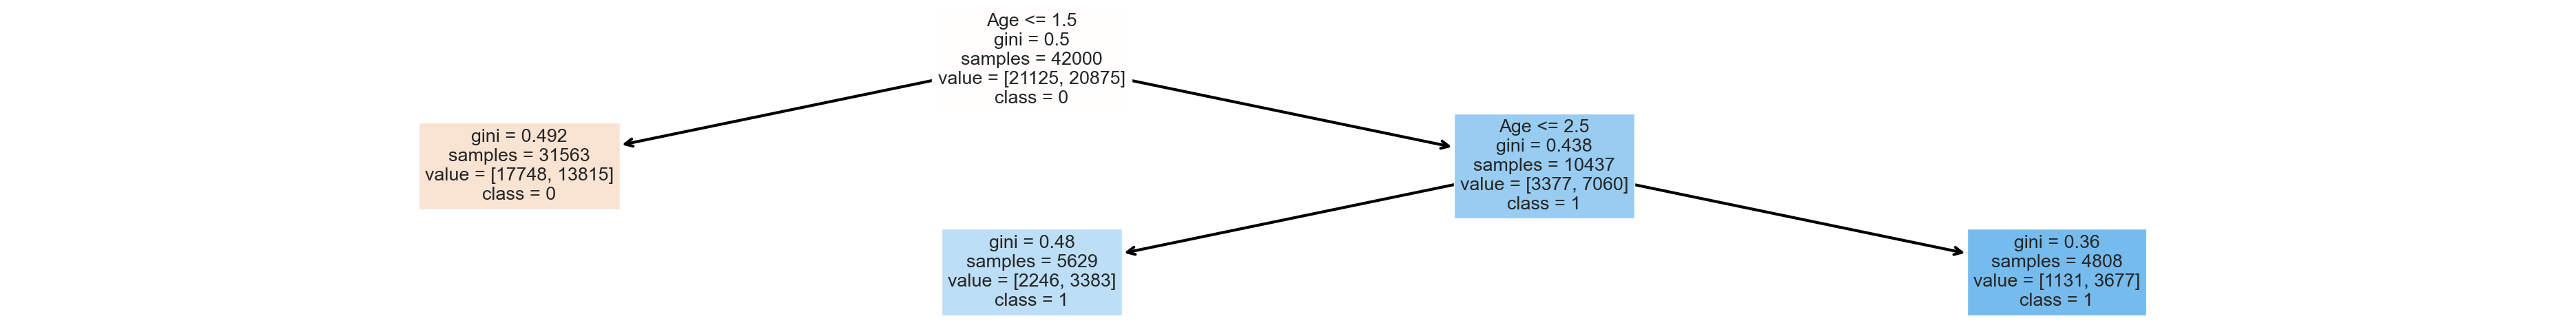

In [48]:
# Import essential models and functions from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sb

# Extract Response and Predictors
y = pd.DataFrame(cardioData["Cardiovascular Disease"])
X = pd.DataFrame(cardioData[["Age", "Weight", "BMI", "Systolic BP", "Diastolic BP", "Cholesterol"]])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Random Forest using Train Data
rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)  # create the random forest object
rf.fit(X_train, y_train)  # train the random forest model

# Predict Response corresponding to Predictors
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rf.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rf.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])

# Plot the Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(48, 6))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)

plt.show()

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target (y)
y = pd.DataFrame(cardioData["Cardiovascular Disease"])
X = pd.DataFrame(cardioData[["Age", "Weight", "BMI", "Systolic BP", "Diastolic BP", "Cholesterol"]])

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=42)

# Convert y_train to a 1D array
y_train = y_train.values.ravel()

# Initialize the random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

# Evaluate the model on the validation data
y_pred = clf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

print("Accuracy on validation set:", accuracy)

Accuracy on validation set: 0.7014285714285714


### 3.3.3. Decision Trees (Cleaned Dataset)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7193148098192609

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7223436109087966



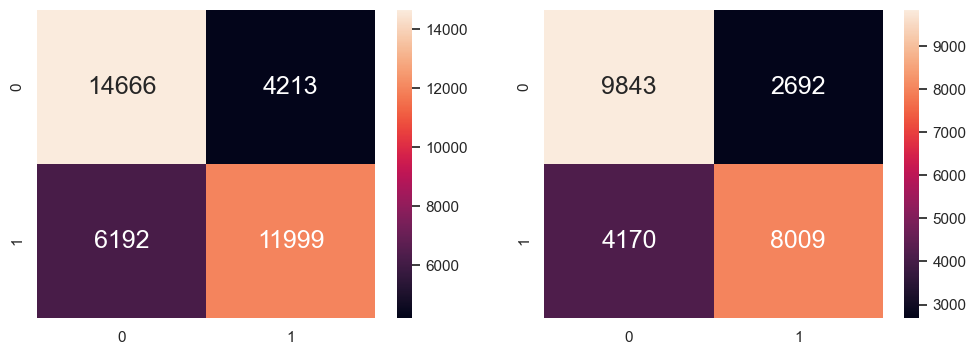

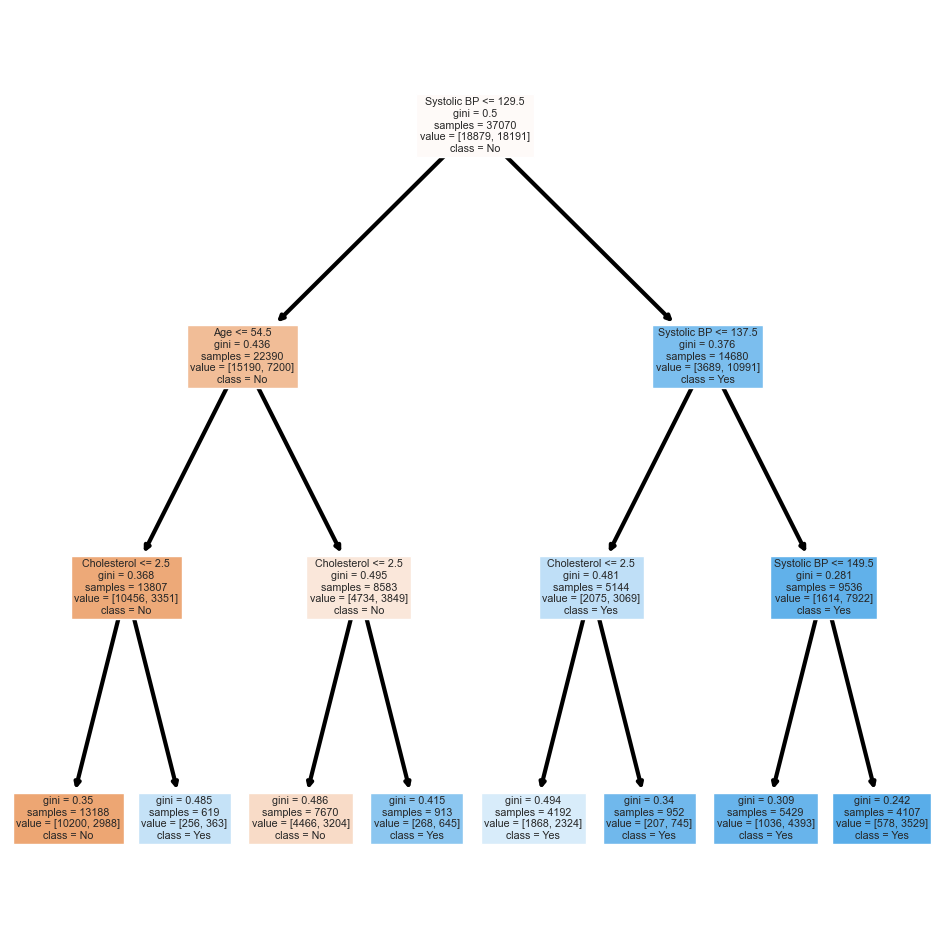

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

y = pd.DataFrame(cleaned_cardioData["Cardiovascular Disease"])
X = pd.DataFrame(cleaned_cardioData[["Age", "Weight", "BMI", "Systolic BP", "Diastolic BP", "Cholesterol"]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

dectree = DecisionTreeClassifier(max_depth = 3) 
dectree.fit(X_train, y_train)                   

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()


f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.598974912328028

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5980415958565996



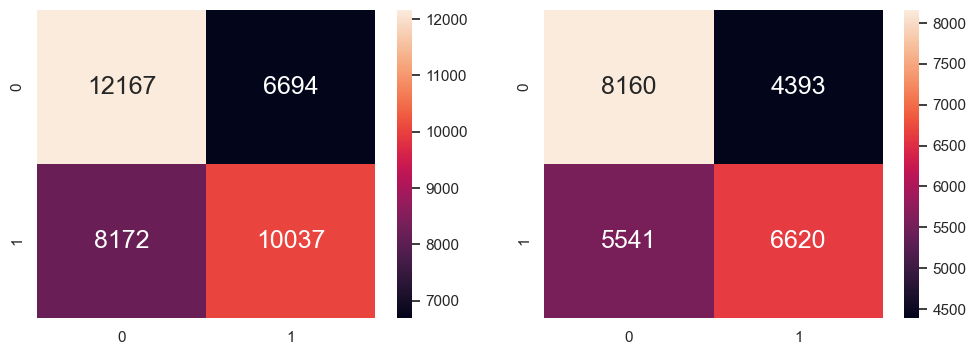

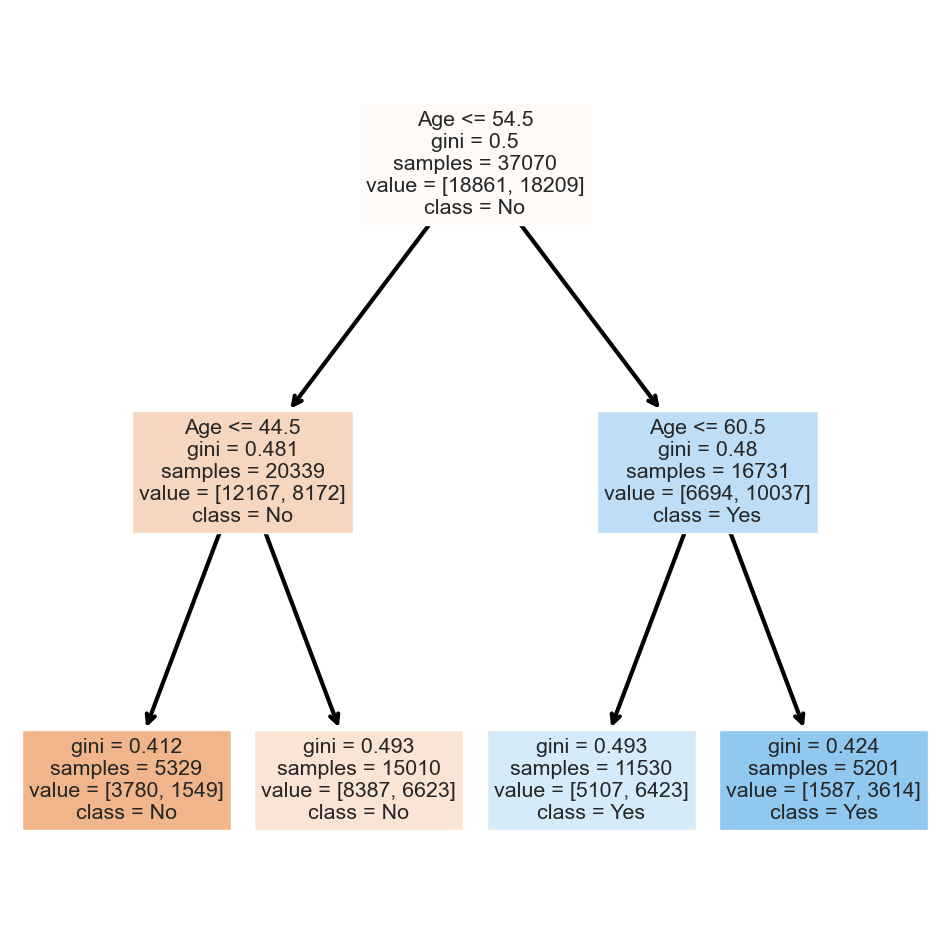

In [51]:
y = pd.DataFrame(cleaned_cardioData["Cardiovascular Disease"])
X = pd.DataFrame(cleaned_cardioData[["Age"]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

dectree = DecisionTreeClassifier(max_depth = 2) 
dectree.fit(X_train, y_train)                   

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()


f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.564877259239277

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5610180464514041



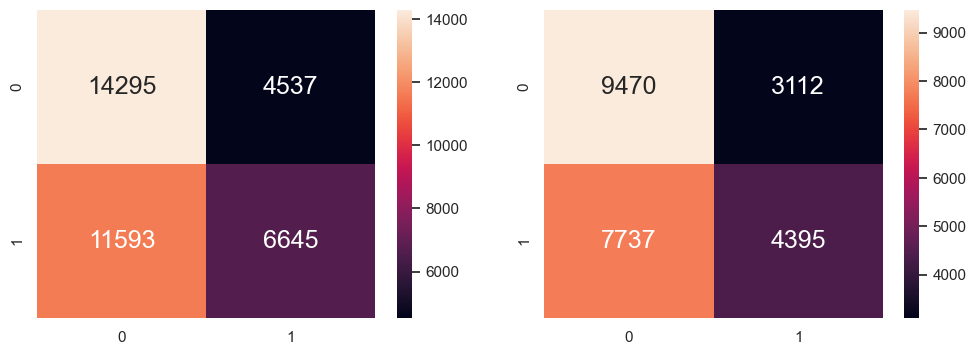

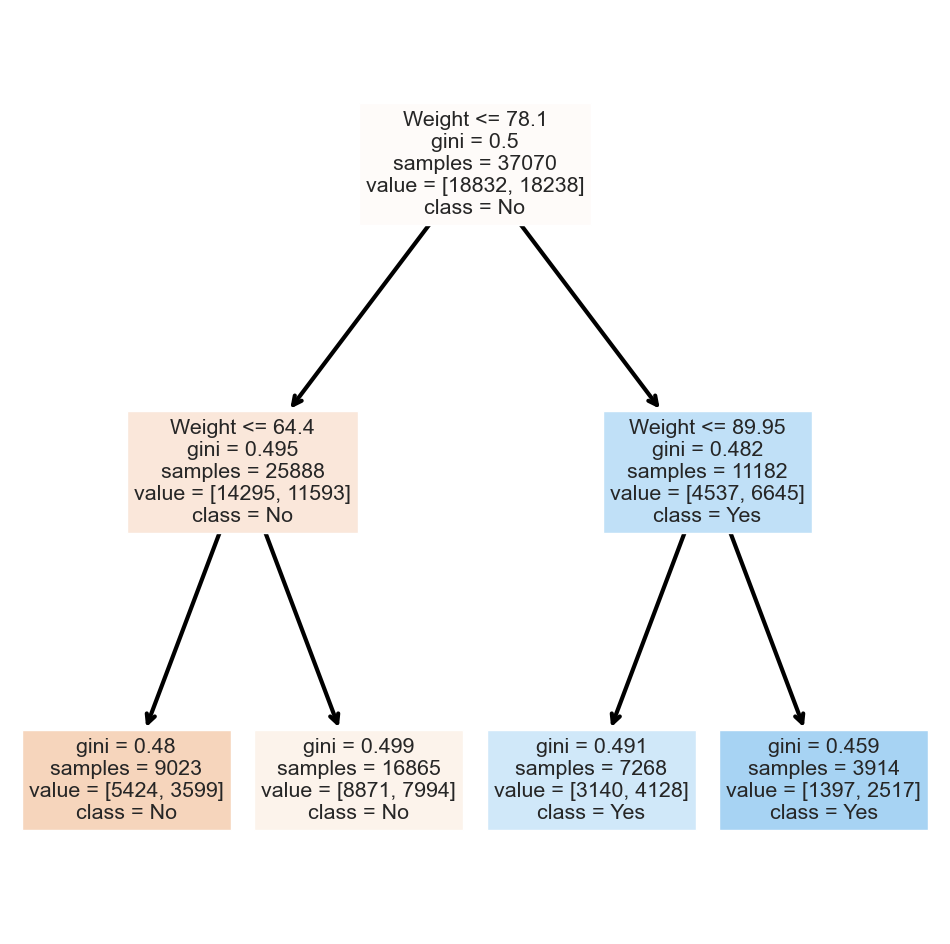

In [52]:
y = pd.DataFrame(cleaned_cardioData["Cardiovascular Disease"])
X = pd.DataFrame(cleaned_cardioData[["Weight"]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

dectree = DecisionTreeClassifier(max_depth = 2) 
dectree.fit(X_train, y_train)                   

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()


f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5737523603992447

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5754228372582342



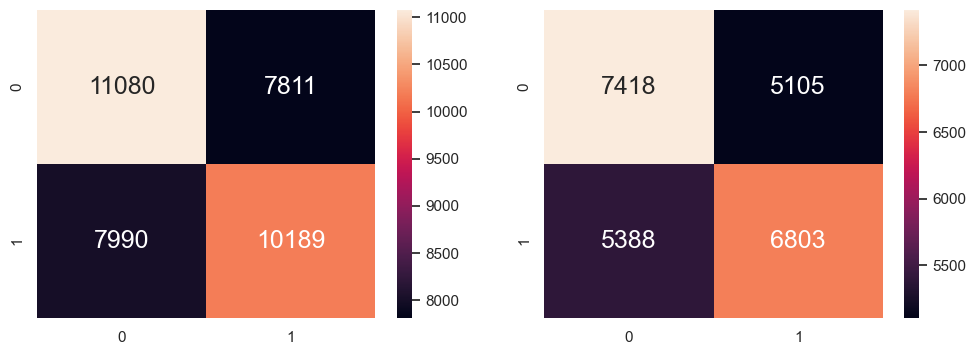

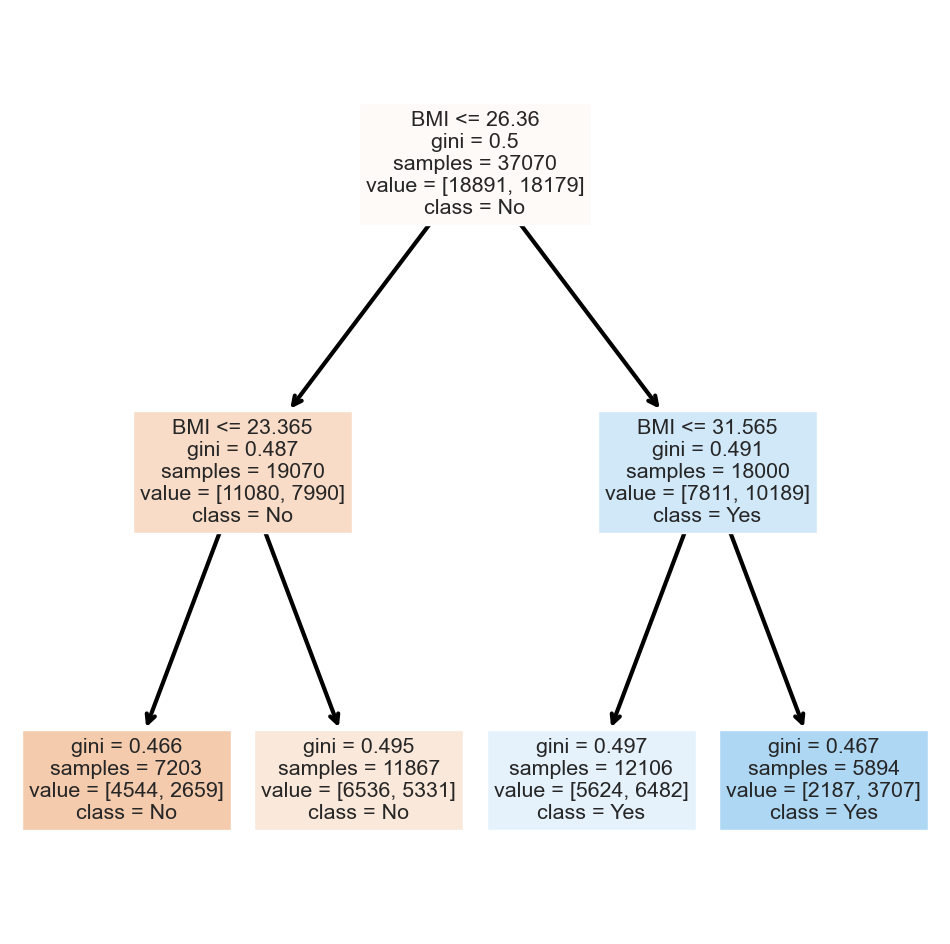

In [53]:
y = pd.DataFrame(cleaned_cardioData["Cardiovascular Disease"])
X = pd.DataFrame(cleaned_cardioData[["BMI"]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

dectree = DecisionTreeClassifier(max_depth = 2) 
dectree.fit(X_train, y_train)                   

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()


f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7094146209873213

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7072914137735696



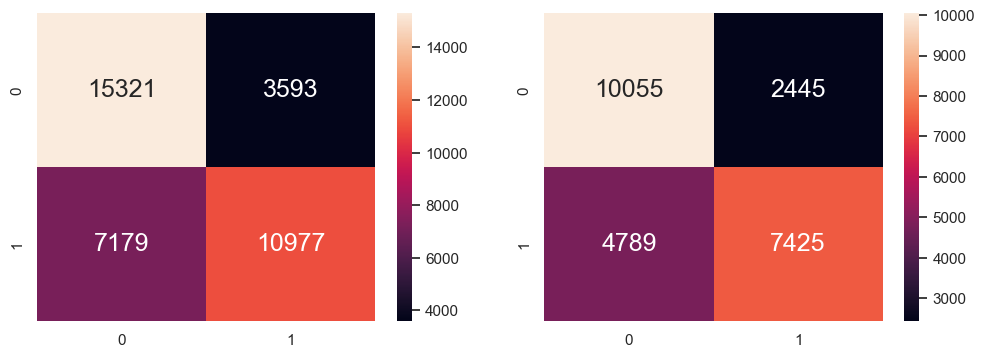

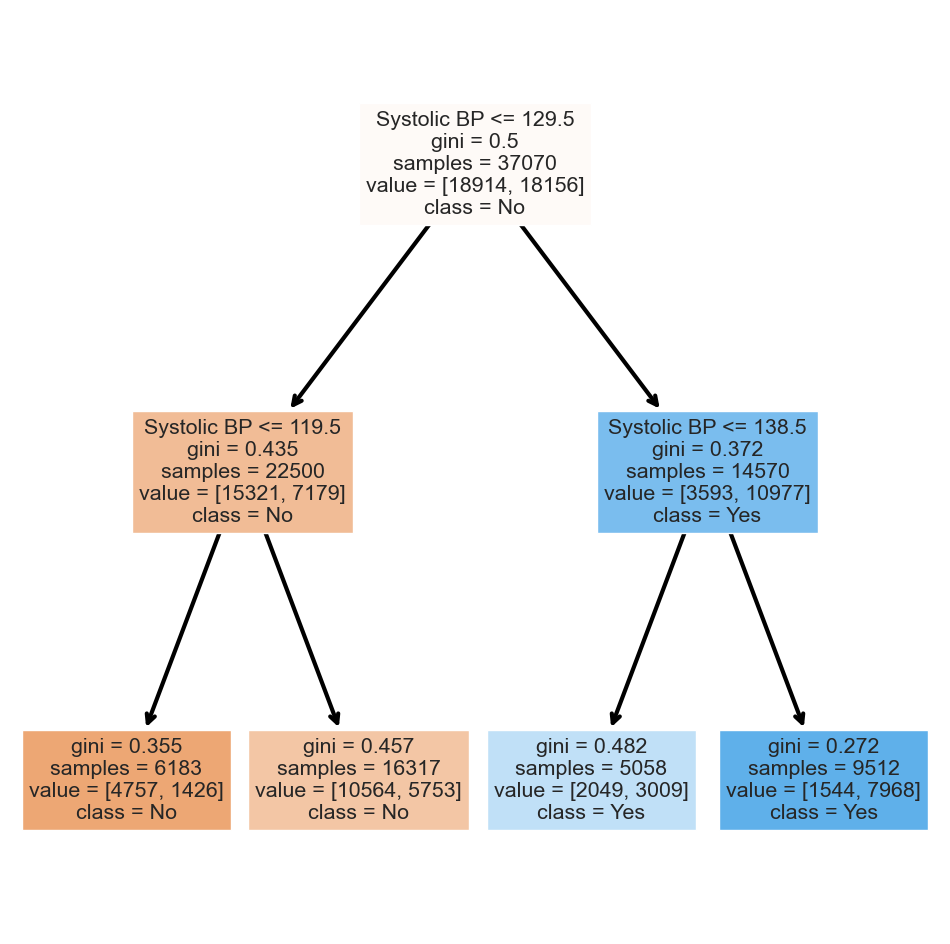

In [54]:
y = pd.DataFrame(cleaned_cardioData["Cardiovascular Disease"])
X = pd.DataFrame(cleaned_cardioData[["Systolic BP"]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

dectree = DecisionTreeClassifier(max_depth = 2) 
dectree.fit(X_train, y_train)                   

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()


f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.65238737523604

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6538803916808287



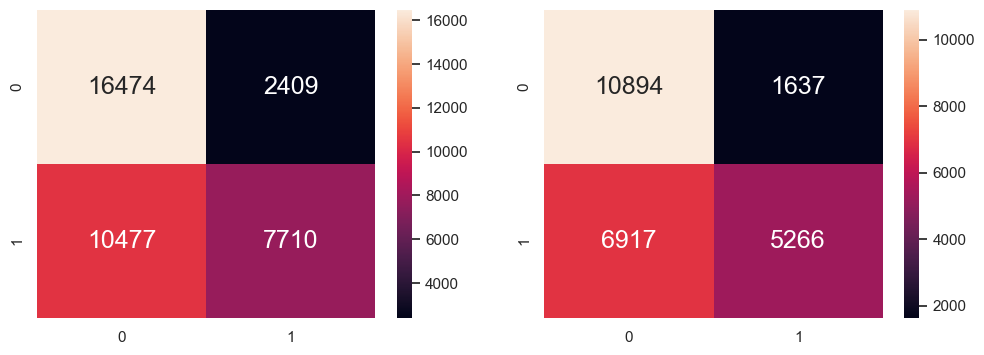

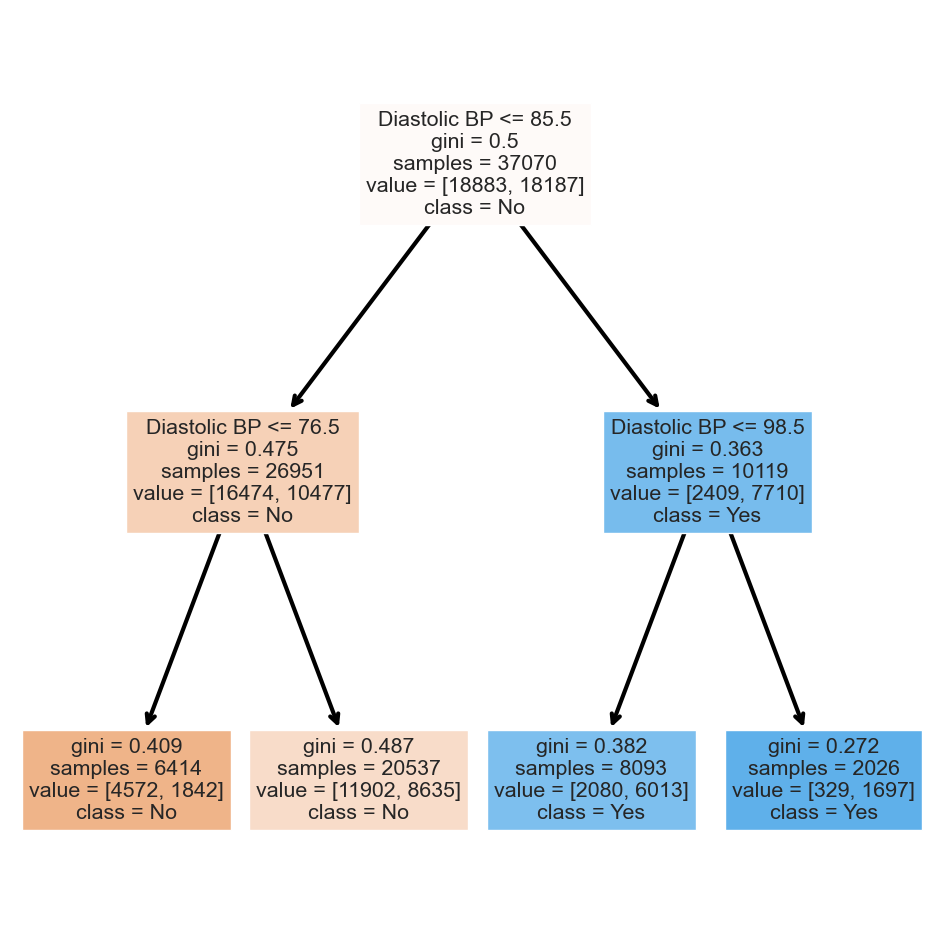

In [55]:
y = pd.DataFrame(cleaned_cardioData["Cardiovascular Disease"])
X = pd.DataFrame(cleaned_cardioData[["Diastolic BP"]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

dectree = DecisionTreeClassifier(max_depth = 2) 
dectree.fit(X_train, y_train)                   

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()


f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5899379552198544

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5920530873189286



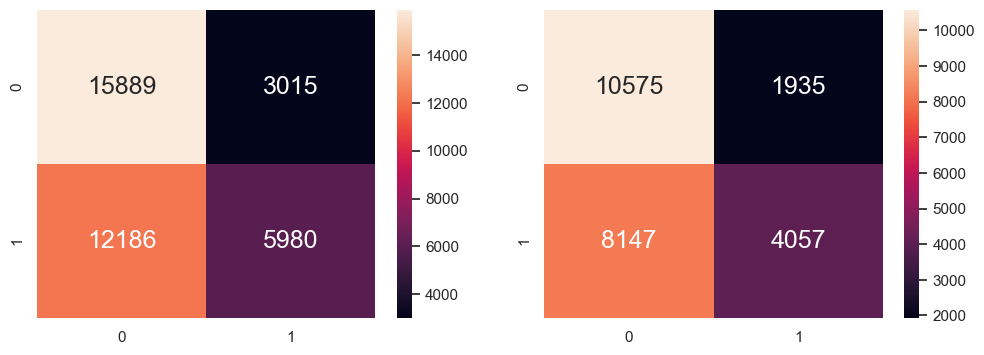

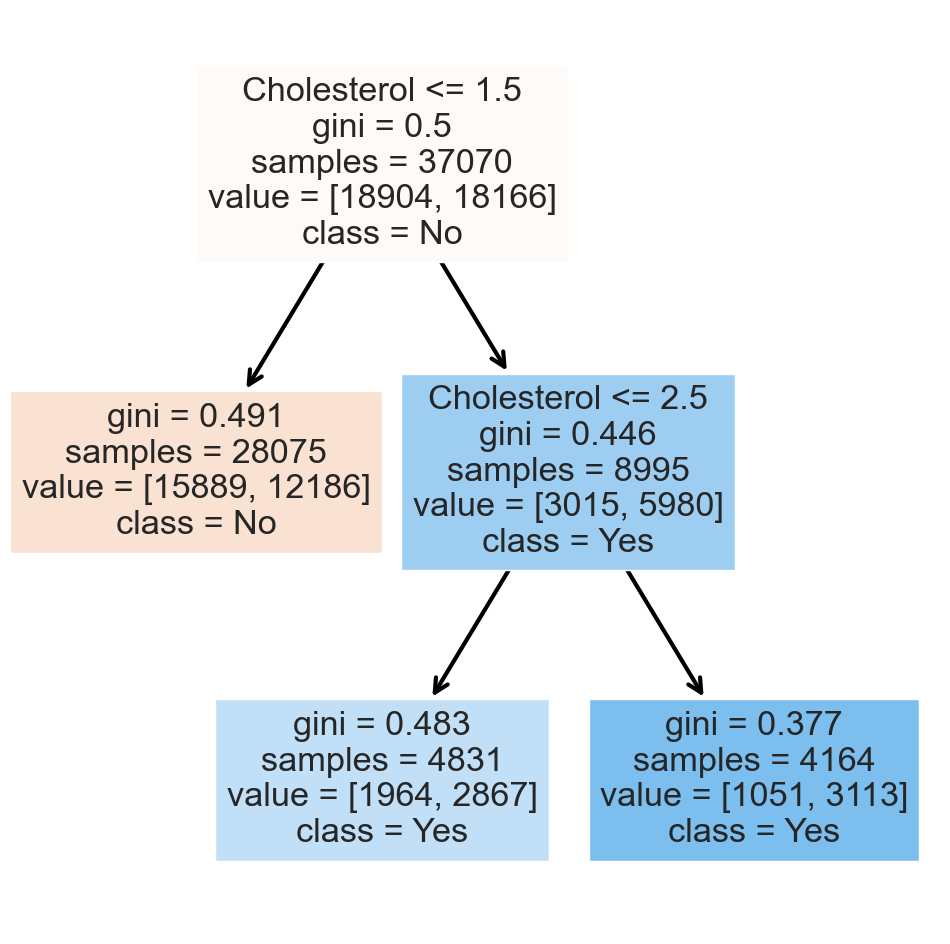

In [56]:
y = pd.DataFrame(cleaned_cardioData["Cardiovascular Disease"])
X = pd.DataFrame(cleaned_cardioData[["Cholesterol"]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

dectree = DecisionTreeClassifier(max_depth = 2) 
dectree.fit(X_train, y_train)                   

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()


f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

### 3.3.4. Random Forest (Cleaned Dataset)

C:\Users\phuaw\AppData\Local\Temp\ipykernel_19916\3472636786.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)  # train the random forest model


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7208524413272188

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7191065792668123



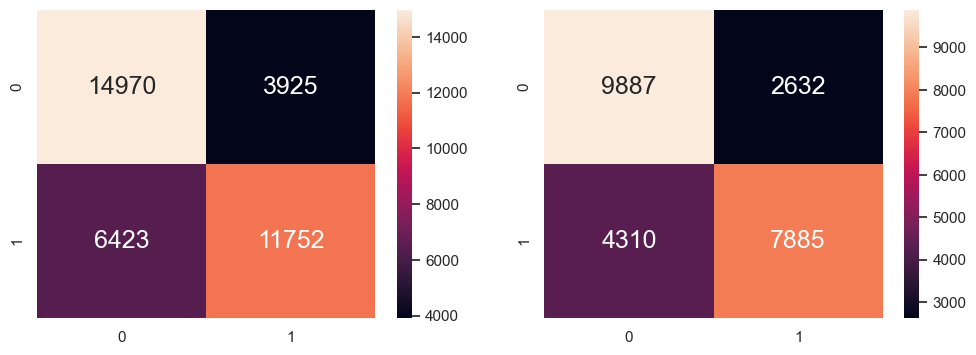

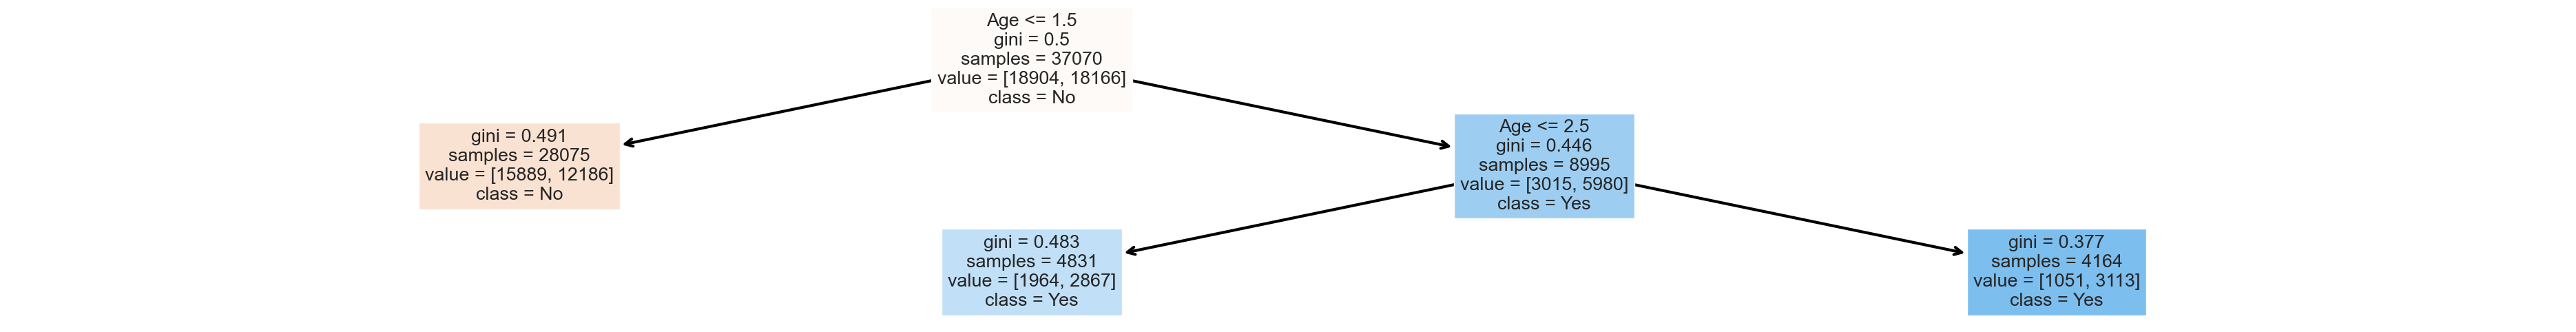

In [57]:
# Import essential models and functions from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sb

# Extract Response and Predictors
y = pd.DataFrame(cleaned_cardioData["Cardiovascular Disease"])
X = pd.DataFrame(cleaned_cardioData[["Age", "Weight", "BMI", "Systolic BP", "Diastolic BP", "Cholesterol"]])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Random Forest using Train Data
rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)  # create the random forest object
rf.fit(X_train, y_train)  # train the random forest model

# Predict Response corresponding to Predictors
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rf.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rf.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])

# Plot the Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(48, 6))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)

plt.show()

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target (y)
y = pd.DataFrame(cleaned_cardioData["Cardiovascular Disease"])
X = pd.DataFrame(cleaned_cardioData[["Age", "Weight", "BMI", "Systolic BP", "Diastolic BP", "Cholesterol"]])

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=42)

# Convert y_train to a 1D array
y_train = y_train.values.ravel()

# Initialize the random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

# Evaluate the model on the validation data
y_pred = clf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

print("Accuracy on validation set:", accuracy)

Accuracy on validation set: 0.6883952415634863
